<h1 align=center style="font-size:2vw"><span style="color:#2EA18C">Proyecto alcaldía de Bucaramanga - Team 211</span></h1>

<h2 align=left ><span style="color:#A12E43">Members:</span></h2>

- Cesar Marín
- Angie Nicole Hernández
- Giovanny De La Cruz
- Jairo David Chia Bejarano
- Juan Sebastian Rojas Sabogal
- Michael Leonardo Gómez Gómez
- José Joaquín Rondón Rubiano

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import folium
import geopandas
import branca
import json

<h1 align=left style="font-size:1.5vw"><span style="color:#2EA18C">1. Dataset: Gender and domestic violence </span></h1>

<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">A) Importing the dataset:</span></h3>

In [2]:
violencia = pd.read_csv('https://raw.githubusercontent.com/Joaron4/team211_datasets/main/Violenciager.csv',encoding="utf-8")
violencia.head(5)

Orden Departamento    Municipio  semana   año Grupo edad Ciclo de vida  \
0      1    SANTANDER  BUCARAMANGA      23  2015    12 a 17  Adolescencia   
1      2    SANTANDER  BUCARAMANGA       5  2015    12 a 17  Adolescencia   
2      3    SANTANDER  BUCARAMANGA      29  2015    12 a 17  Adolescencia   
3      4    SANTANDER  BUCARAMANGA      16  2015    12 a 17  Adolescencia   
4      5    SANTANDER  BUCARAMANGA      44  2015    12 a 17  Adolescencia   

       sexo_               area_      Barrio  ... sust_vict  \
0  Masculino  CABECERA MUNICIPAL  Transición  ...         2   
1  Masculino  CABECERA MUNICIPAL     Betania  ...         2   
2   Femenino  CABECERA MUNICIPAL  EL MIRADOR  ...         2   
3   Femenino  CABECERA MUNICIPAL   María Paz  ...         2   
4   Femenino  CABECERA MUNICIPAL   Colorados  ...         2   

                 fec_hecho  hora_hecho  escenario zona_conf  \
0  2015-06-12T00:00:00.000       06:30        1.0         2   
1  2015-02-04T00:00:00.000       10:00        1.0         2   
2  2015-07-21T00:00:00.000       08:00        2.0         2   
3  2015-04-22T00:00:00.000       13:30        1.0         2   
4  2015-11-01T00:00:00.000       20:00        7.0         2   

                                             nom_eve  \
0  VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...   
1  VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...   
2  VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...   
3  VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...   
4  VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...   

                              nom_upgd  ndep_resi    nmun_resi            MES  
0           SERVICLINICOS DROMEDICA SA  SANTANDER  BUCARAMANGA      06. Junio  
1             HOSPITAL LOCAL DEL NORTE  SANTANDER  BUCARAMANGA    02. Febrero  
2  HOSPITAL UNIVERSITARIO DE SANTANDER  SANTANDER  BUCARAMANGA      07. Julio  
3             HOSPITAL LOCAL DEL NORTE  SANTANDER  BUCARAMANGA      04. Abril  
4             HOSPITAL LOCAL DEL NORTE  SANTANDER  BUCARAMANGA  11. Noviembre  

[5 rows x 32 columns]

<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">B) Exploring our Dataset:</span></h3>

## - Dataset columns:

In [3]:
violencia.columns

Index(['Orden', 'Departamento', 'Municipio', 'semana', 'año', 'Grupo edad',
       'Ciclo de vida', 'sexo_', 'area_', 'Barrio', 'Comuna',
       'Tipo de Seguridad Social', 'pac_hos_', 'con_fin_', 'version',
       'naturaleza', 'def_naturaleza', 'actividad', 'nom_actividad',
       'edad_agre', 'sexo_agre', 'parentezco_vict', 'sust_vict', 'fec_hecho',
       'hora_hecho', 'escenario', 'zona_conf', 'nom_eve', 'nom_upgd',
       'ndep_resi', 'nmun_resi', 'MES'],
      dtype='object')

## - Filtering by deparment: Santander

We chose the deparment of santander instead of just the city of Bucaramanga aiming to complete the missing values

In [4]:
violencia = violencia[violencia['Departamento'] == 'SANTANDER']
violencia['Departamento'] = violencia['Departamento'].str.lower()
violencia['Municipio'] =violencia['Municipio'].str.lower()

In [5]:
violencia.columns= violencia.columns.str.lower()

## - Missing Values

In [6]:
percent_missing = violencia.isnull().sum() * 100 / len(violencia)
miss_values = pd.DataFrame({'label': violencia.columns,
                            'missing': percent_missing})
miss_values[miss_values['missing']> 0]

label    missing
naturaleza          naturaleza   1.445030
def_naturaleza  def_naturaleza   1.445030
edad_agre            edad_agre  24.585042
sexo_agre            sexo_agre   0.068346
fec_hecho            fec_hecho   0.048819
hora_hecho          hora_hecho  44.727592
escenario            escenario   0.029291

<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">C) Giving consistency to our dataset and data cleaning:</span></h3>

Firstly, These are the colums and their data type:

In [7]:
violencia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10242 entries, 0 to 10334
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   orden                     10242 non-null  int64  
 1   departamento              10242 non-null  object 
 2   municipio                 10242 non-null  object 
 3   semana                    10242 non-null  int64  
 4   año                       10242 non-null  int64  
 5   grupo edad                10242 non-null  object 
 6   ciclo de vida             10242 non-null  object 
 7   sexo_                     10242 non-null  object 
 8   area_                     10242 non-null  object 
 9   barrio                    10242 non-null  object 
 10  comuna                    10242 non-null  object 
 11  tipo de seguridad social  10242 non-null  object 
 12  pac_hos_                  10242 non-null  int64  
 13  con_fin_                  10242 non-null  int64  
 14  versio

## - Year and week

We'll convert the week and Year int 64 columns to date time

In [8]:
violencia['semana'] = pd.to_datetime(violencia['semana'], format="%w",errors='ignore')

- there are 3 unconvertable week values, so for the time being we'll ignore it

In [9]:

violencia['año'] = pd.to_datetime(violencia['año'], format="%Y")

## - Age group and lifecycle

We converted these two data objects to categories, Also we change some error excel values to np.nan 

In [10]:
violencia['grupo edad'] =violencia['grupo edad'].replace('ERROR: #N/A',np.nan).astype('category') 

In [11]:
violencia['ciclo de vida']= violencia['ciclo de vida'].replace('ERROR: #N/A',np.nan).str.lower()

## - Sex

There are only two values F and M, so we coverted it to two categories, and lowered their case

In [12]:
violencia['sexo_'] = violencia['sexo_'].astype('category').str.lower()

## - Neighboorhoods

We upper the case of the neighboorhoods 

In [13]:
violencia['barrio'] = violencia['barrio'].str.upper()

## - Boroughs

The boroughs were quite a challenge as they had points and numbers in each entry.

- First we lowered the case

In [14]:
violencia['comuna']= violencia['comuna'].str.lower()

- Then ussing re we got rid of those points and numbers, and appended it to a list

In [15]:

order = r'[0-9,.]'
comunas = list(violencia['comuna'].str.lower())
comunas_clean = []
for i in range(len(comunas)):
    
    filtered_string = re.sub(order,'',comunas[i])
    comunas_clean.append(filtered_string.lstrip())        

comunas_clean = pd.Series(comunas_clean)

- Finally we replace the *Comuna* colums with our cleaned list 

In [16]:
violencia['comuna'] =comunas_clean

## - Social security

We only lowered its case

In [17]:
violencia['tipo de seguridad social']=violencia['tipo de seguridad social'].str.lower()

## - Death or alive arrival state

CoWe converted it to a category, but there was a strange categoy '0' which din´t corresponded to death or alive so we replaced it with nan values

In [18]:
violencia[violencia['con_fin_']==0].count()

orden                       4
departamento                4
municipio                   4
semana                      4
año                         4
grupo edad                  4
ciclo de vida               4
sexo_                       4
area_                       4
barrio                      4
comuna                      4
tipo de seguridad social    4
pac_hos_                    4
con_fin_                    4
version                     4
naturaleza                  4
def_naturaleza              4
actividad                   4
nom_actividad               4
edad_agre                   3
sexo_agre                   4
parentezco_vict             4
sust_vict                   4
fec_hecho                   4
hora_hecho                  3
escenario                   4
zona_conf                   4
nom_eve                     4
nom_upgd                    4
ndep_resi                   4
nmun_resi                   4
mes                         4
dtype: int64

In [19]:
violencia['con_fin_'] = violencia['con_fin_'].astype('category').replace(0,np.nan)

## - Type of violence and description

There was a category ('99') that meant 'no information', so we converted it to a nan to perform interpolation in this column, then it was categorized

In [20]:
violencia['naturaleza'] = violencia['naturaleza'].replace(99.0,np.nan)
violencia['naturaleza']=violencia['naturaleza'].astype('category')

'no information' was replaced by a nan

In [21]:


violencia['def_naturaleza'] =violencia['def_naturaleza'].replace('Sin información',np.nan)
violencia['def_naturaleza']=violencia['def_naturaleza'].str.lower().astype('category')

## - Type of activity and description

we categorized the activities

In [22]:
violencia['actividad']
violencia['actividad'] =violencia['actividad'].astype('category')

there was what seemend to be a excel error we changed it to a nan value

In [23]:
violencia['nom_actividad']= violencia['nom_actividad'].replace('ERROR: #N/A',np.nan).str.lower()
violencia['nom_actividad'] =violencia['nom_actividad'].astype('category')

In [24]:
violencia['nom_actividad'].unique()

['otro', 'estudiante', 'reciclador', 'trabajadora domestica', 'servidor publico', ..., 'persona dedicada al cuidado del hogar', 'líder cívico', 'persona en situación de prostitución', NaN, 'persona que cuida a otros']
Length: 13
Categories (12, object): ['otro', 'estudiante', 'reciclador', 'trabajadora domestica', ..., 'persona dedicada al cuidado del hogar', 'líder cívico', 'persona en situación de prostitución', 'persona que cuida a otros']

## - Agressor age

We change this float64 to a category in order to replace its missing values (which were around 24%), also it seemed a little nonsensical that that there were 2000 agressors with age 0 so we remplaced those values with a nan.

This provoked that the missing values skyrocketed from 24% to 50%

In [25]:

violencia['edad_agre']=violencia['edad_agre'].astype('category')


In [26]:
violencia['edad_agre'] = violencia['edad_agre'].replace(0.0,np.nan)

In [27]:
violencia['edad_agre']=violencia['edad_agre'].astype('float64')

## - Agressor sex

It has 4 categories M,MF SD e I

In [28]:
violencia['sexo_agre'] =violencia['sexo_agre'].astype('category')

## - Victim kinship

we lowered its case

In [29]:
violencia['parentezco_vict'] = violencia['parentezco_vict'].str.lower()


## - Ocurrence date

We changed the ocurrence date to date time, we had to split the original object date


In [30]:
violencia['fec_hecho']=pd.to_datetime(violencia['fec_hecho'].str.split('T00').str[0],format='%Y-%m-%d')

## - Ocurrence Hour

We are missing 44% of hour data but we hadn´t any feasible way of interpolating these valeus so we had to only convert the complete values that we had to date time.


In [31]:
violencia['hora_hecho'] = pd.to_datetime(violencia['hora_hecho'],format='%H:%M',errors= 'ignore')

## - Residence deparment

We lowered its case

In [32]:
violencia['ndep_resi'] = violencia['ndep_resi'].str.lower()

## - Month

We changed the month to datetime

In [33]:
violencia['mes'] = pd.to_datetime(violencia['mes'].str.split('.').str[0],format='%m').dt.month

# Final result

In [34]:
violencia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10242 entries, 0 to 10334
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   orden                     10242 non-null  int64         
 1   departamento              10242 non-null  object        
 2   municipio                 10242 non-null  object        
 3   semana                    10242 non-null  int64         
 4   año                       10242 non-null  datetime64[ns]
 5   grupo edad                10241 non-null  category      
 6   ciclo de vida             10241 non-null  object        
 7   sexo_                     10242 non-null  object        
 8   area_                     10242 non-null  object        
 9   barrio                    10242 non-null  object        
 10  comuna                    10153 non-null  object        
 11  tipo de seguridad social  10242 non-null  object        
 12  pac_hos_          

<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">D) Interpolating missing values:</span></h3>

## New missing values percentage:

In [35]:
percent_missing = violencia.isnull().sum() * 100 / len(violencia)
miss_values = pd.DataFrame({'label': violencia.columns,
                            'missing': percent_missing})
miss_values[miss_values['missing']> 0]

label    missing
grupo edad          grupo edad   0.009764
ciclo de vida    ciclo de vida   0.009764
comuna                  comuna   0.868971
con_fin_              con_fin_   0.039055
naturaleza          naturaleza   7.527827
def_naturaleza  def_naturaleza   7.527827
nom_actividad    nom_actividad   0.048819
edad_agre            edad_agre  50.390549
sexo_agre            sexo_agre   0.068346
fec_hecho            fec_hecho   0.048819
hora_hecho          hora_hecho  44.727592
escenario            escenario   0.029291

## -Type of violence

Firstly we interpolated the ktypes of violence

In [36]:
cat_codes_num = violencia['naturaleza'].cat.codes.replace(-1, np.nan)
cat_codes_num = cat_codes_num.interpolate()
cat_codes_num = cat_codes_num.astype(int).astype('category')
#-------------------------------
violencia['naturaleza'] = cat_codes_num

As the 'naturaleza' categories correspond to a code of type of violence, we took the name of the violent act and assinged it to its  interpolated category value.

In [37]:
dicnat = {0:'violencia fisica',
          1:'violencia psicologica',
          2:'negligencia y abandono',
          3:'abuso sexual',
          4:'acoso sexual',
          5:'violacion',
          6:'explotacion sexual, comercial niños, adolescentes',
          7:'actos sexuales violencia',
          8:'otros actos sexuales'    
}
numbers = list(violencia[violencia['def_naturaleza'].isna()].index)
for i in range(len(numbers)):
    violencia['def_naturaleza'].loc[numbers[i]] = dicnat[violencia['naturaleza'].loc[i] ]

## - Agressor age

We had about a 50% missing values, regardless of this we proceeded to interpolating this value

In [38]:

cat_codes_age= violencia['edad_agre'].interpolate()
cat_codes_age = round(cat_codes_age.astype(float),1)
#--------------
violencia['edad_agre'] = cat_codes_age

## - Activities

We did the same as in type of violence

In [39]:
cat_codes_act = violencia['actividad'].cat.codes.replace(-1, np.nan)
cat_codes_act= cat_codes_act.interpolate()
cat_codes_act=cat_codes_act.astype(int).astype('category')
# #--------------
violencia['actividad'] = cat_codes_act

This colums were mostly complete it only missed a few 9 category = nan values, we chose to replace thes values to ninguno and its corresponding category '12'


In [40]:
dicact = {9: 'ninguna'   
}
#12
numbers_act = list(violencia[violencia['nom_actividad'].isna()].index)
for i in range(len(numbers_act)):
   
    violencia['nom_actividad'].loc[numbers_act[i]] = dicact[9]
    violencia['actividad'].loc[numbers_act[i]] = 12

# Final result

In [41]:
percent_missing = violencia.isnull().sum() * 100 / len(violencia)
miss_values = pd.DataFrame({'label': violencia.columns,
                            'missing': percent_missing})
miss_values[miss_values['missing']> 0]

label    missing
grupo edad        grupo edad   0.009764
ciclo de vida  ciclo de vida   0.009764
comuna                comuna   0.868971
con_fin_            con_fin_   0.039055
sexo_agre          sexo_agre   0.068346
fec_hecho          fec_hecho   0.048819
hora_hecho        hora_hecho  44.727592
escenario          escenario   0.029291

<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">E) EDA:</span></h3>

We comenced our EDA by describing some values of our dataset

In [42]:
violencia['edad_agre'].describe()

count    10242.000000
mean        29.331722
std          9.242218
min          5.000000
25%         25.000000
50%         27.700000
75%         32.000000
max         99.000000
Name: edad_agre, dtype: float64

In [43]:
violencia['semana'].describe()

count    10242.000000
mean        24.828842
std         15.020856
min          1.000000
25%         11.000000
50%         24.000000
75%         38.000000
max         53.000000
Name: semana, dtype: float64

In [44]:
violencia['grupo edad'].describe()

count     10241
unique        6
top       0 a 6
freq       3268
Name: grupo edad, dtype: object

In [45]:
violencia['ciclo de vida'].describe()

count                10241
unique                   6
top       primera infancia
freq                  3268
Name: ciclo de vida, dtype: object

In [46]:
violencia['comuna'].describe()

count     10153
unique       64
top       norte
freq       1685
Name: comuna, dtype: object

In [47]:
violencia['nom_actividad'].describe()

count     10242
unique       12
top        otro
freq       4820
Name: nom_actividad, dtype: object

In [48]:
violencia['parentezco_vict'].describe()

count     10242
unique       25
top       madre
freq       3554
Name: parentezco_vict, dtype: object

## - Searching for correlation

We tried to find some correlation between our variables

In [49]:
violencia.corr()

orden    semana  pac_hos_  edad_agre  sust_vict  escenario  \
orden      1.000000 -0.066544  0.007827  -0.092318   0.016887   0.085436   
semana    -0.066544  1.000000  0.001193   0.009107   0.001932   0.001861   
pac_hos_   0.007827  0.001193  1.000000   0.042076   0.031254  -0.017909   
edad_agre -0.092318  0.009107  0.042076   1.000000  -0.007190  -0.042778   
sust_vict  0.016887  0.001932  0.031254  -0.007190   1.000000  -0.016889   
escenario  0.085436  0.001861 -0.017909  -0.042778  -0.016889   1.000000   
zona_conf  0.028320 -0.009106 -0.018543  -0.007466   0.040347   0.007305   
mes       -0.084658  0.905272  0.015861   0.023012  -0.007642   0.014107   

           zona_conf       mes  
orden       0.028320 -0.084658  
semana     -0.009106  0.905272  
pac_hos_   -0.018543  0.015861  
edad_agre  -0.007466  0.023012  
sust_vict   0.040347 -0.007642  
escenario   0.007305  0.014107  
zona_conf   1.000000 -0.000865  
mes        -0.000865  1.000000

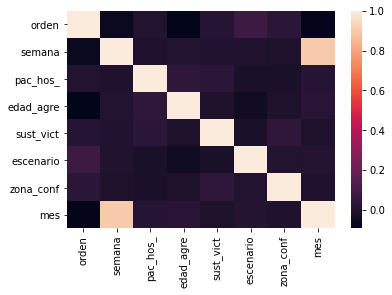

In [50]:
sns.heatmap(violencia.corr());

As we can see there aren't many strongly correlated values, excepting the week and month variables

## - Plotting the data

First we'll plot the municipality with more ocurrences

In [51]:
violencia_ocurrences= violencia.groupby('municipio').count().reset_index().sort_values('naturaleza',ascending=False)

[Text(0.5, 0, 'ocurrences')]

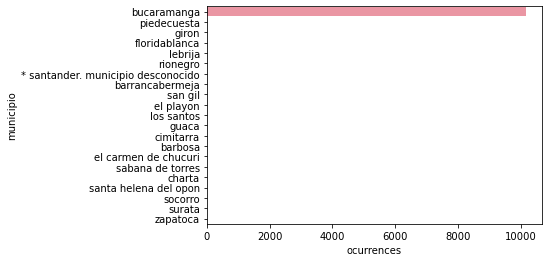

In [52]:
sns.barplot(y='municipio',x='naturaleza',data = violencia_ocurrences, orient = 'h').set(xlabel='ocurrences')

Even though we use The Santander's cases, we still find that the majority of cases concurr in Bucaramanga

In [53]:
voilencia_ocurrences_outside_buc = violencia_ocurrences[violencia_ocurrences['municipio'] != 'bucaramanga']

[Text(0.5, 0, 'ocurrences')]

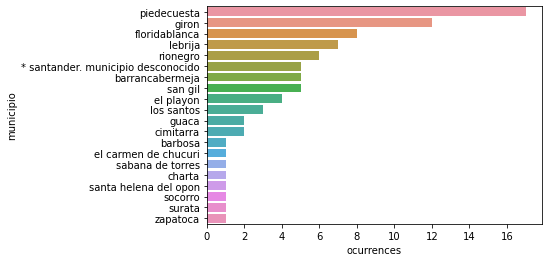

In [54]:
sns.barplot(y='municipio',x='naturaleza',data = voilencia_ocurrences_outside_buc, orient = 'h').set(xlabel='ocurrences')

In [55]:
violencia_comuna= violencia.groupby('comuna').count().reset_index().sort_values('naturaleza',ascending=False)

Then we plotted the number of ocurrences per borough

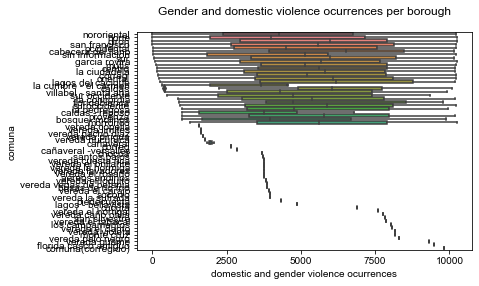

In [56]:
violencia_ocurrences_bucaramanga = violencia[violencia['municipio'] == 'bucaramanga']
#violencia_ocurrences_bucaramanga =violencia.groupby('orden').count().reset_index().sort_values('naturaleza',ascending=False).head(10)


ax= sns.boxplot(y='comuna',x='orden',data = violencia_ocurrences_bucaramanga,orient='h',palette='husl').set(xlabel='domestic and gender violence ocurrences',title='Gender and domestic violence ocurrences per borough\n');
rcParams['figure.figsize'] = 50,50
sns.set(font_scale = 2)


Then we plotted the number of kinds of violence

[Text(0.5, 0, 'ocurrences')]

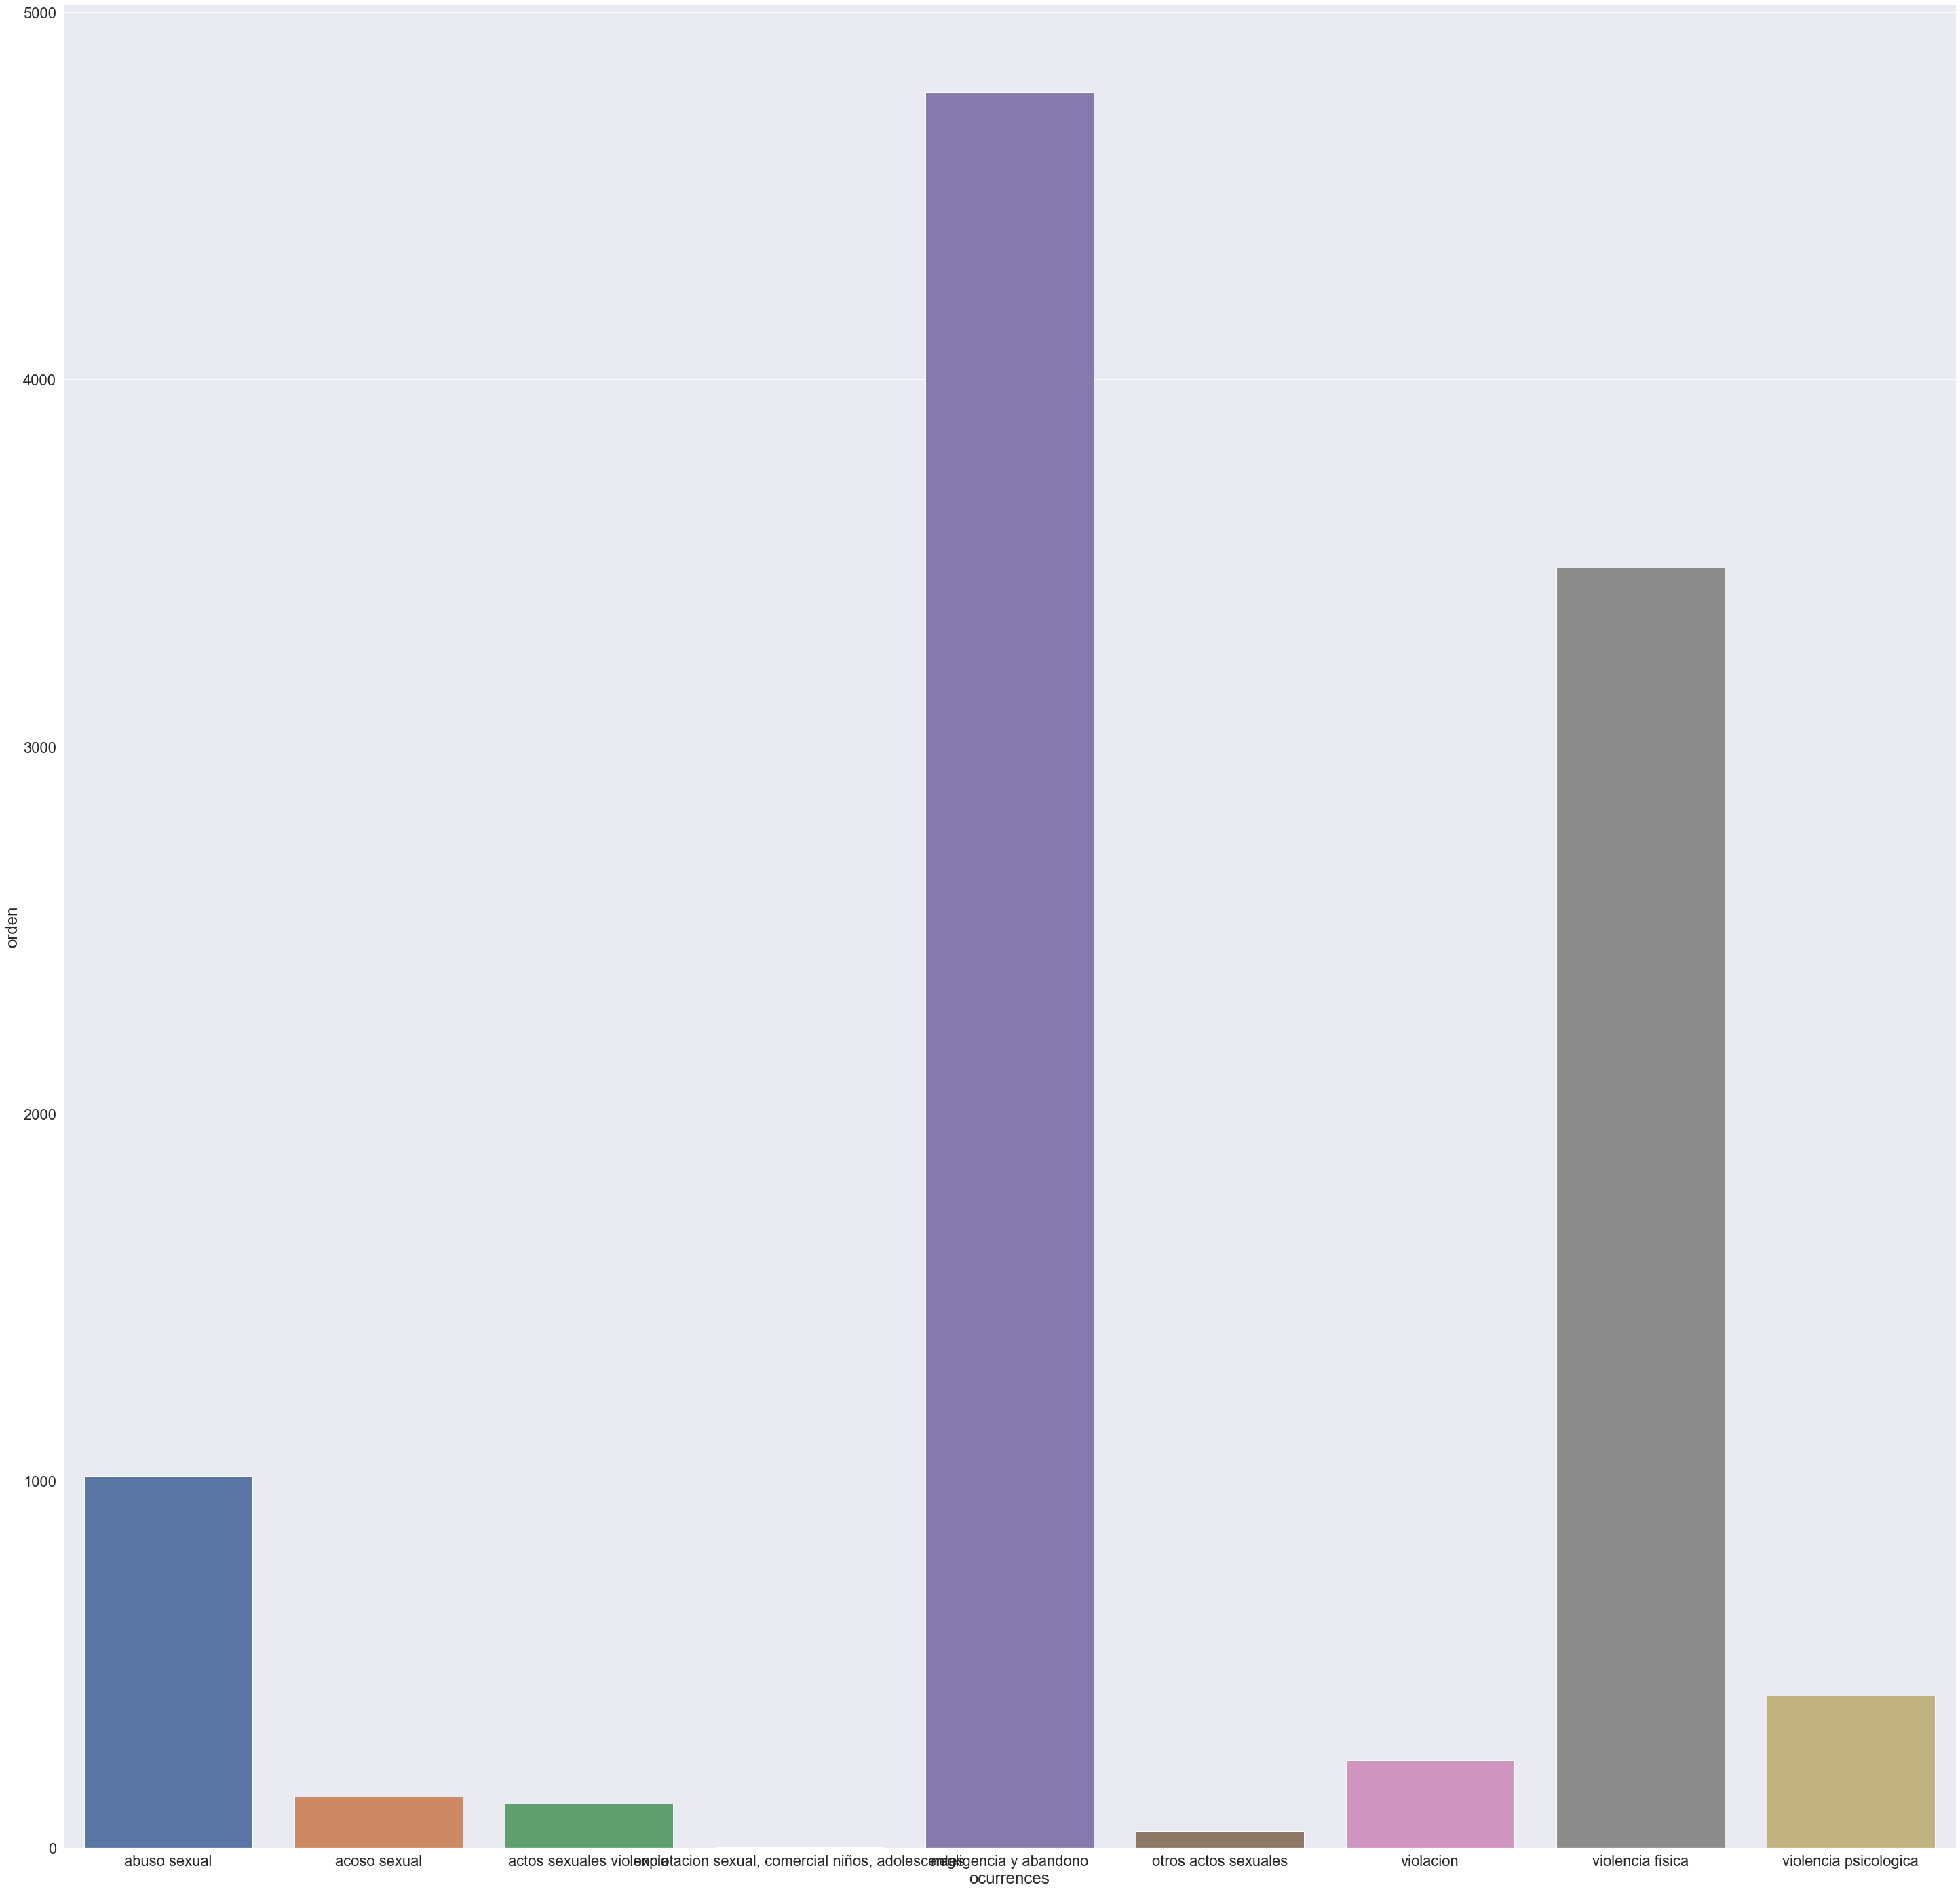

In [57]:
violencia_nat= violencia.groupby('def_naturaleza').count().reset_index().sort_values(by='orden',ascending=False)
sns.barplot(x='def_naturaleza',y=violencia_nat['orden'],data = violencia_nat).set(xlabel='ocurrences')


Finally, we plotted the ocurrences by year

In [58]:
violencia_año= violencia.groupby('año').count().reset_index().sort_values('orden',ascending=False)

<AxesSubplot:xlabel='año', ylabel='naturaleza'>

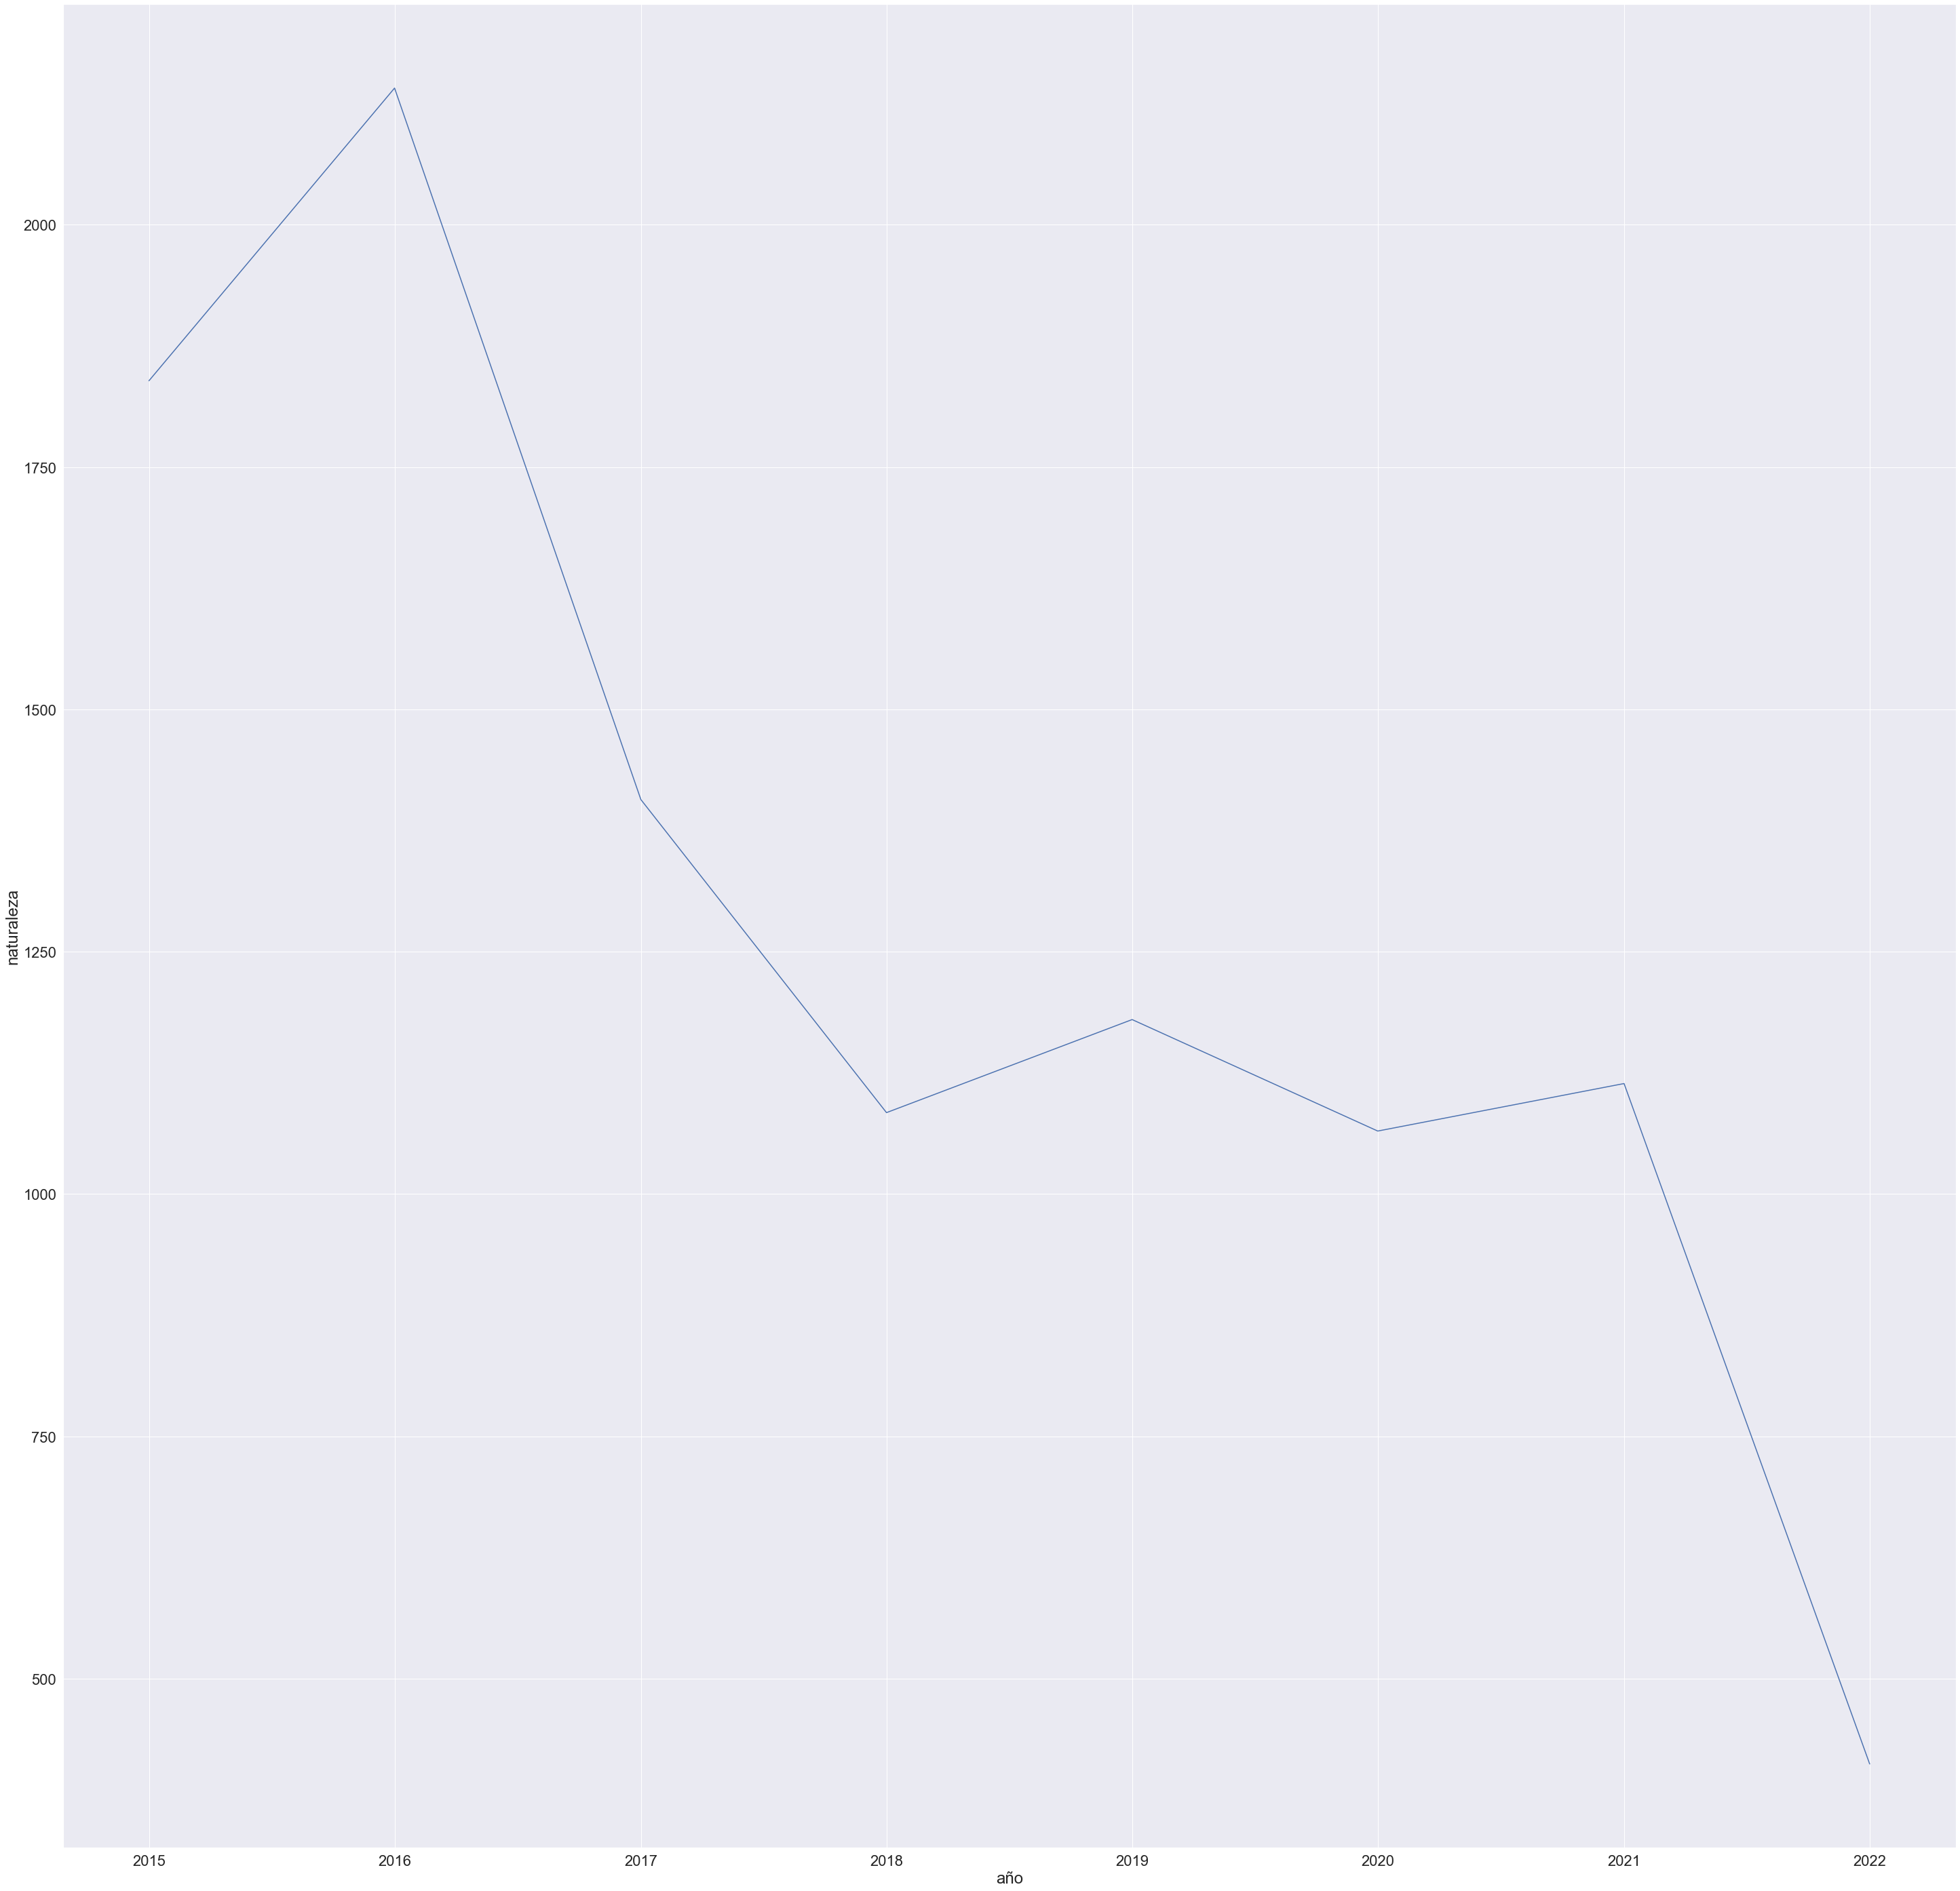

In [59]:
sns.lineplot(x='año',y= 'naturaleza',data = violencia_año)

In [60]:
pd.crosstab(index=violencia['comuna'], columns=violencia['def_naturaleza'], margins=True).sort_values('negligencia y abandono',ascending=False)

def_naturaleza       abuso sexual  acoso sexual  actos sexuales violencia  \
comuna                                                                      
All                          1007           139                       120   
norte                         149            21                        23   
san francisco                  82             6                        11   
sin informacion                94             7                         8   
occidental                     76             7                         9   
...                           ...           ...                       ...   
vereda el tabacal               0             0                         0   
vereda el rosario               0             0                         0   
vereda el hortigal              1             0                         0   
vereda el brillante             0             0                         0   
aereos andinos                  1             0                         0   

def_naturaleza       explotacion sexual, comercial niños, adolescentes  \
comuna                                                                   
All                                                                  3   
norte                                                                0   
san francisco                                                        0   
sin informacion                                                      0   
occidental                                                           0   
...                                                                ...   
vereda el tabacal                                                    0   
vereda el rosario                                                    0   
vereda el hortigal                                                   0   
vereda el brillante                                                  0   
aereos andinos                                                       0   

def_naturaleza       negligencia y abandono  otros actos sexuales  violacion  \
comuna                                                                         
All                                    4742                    45        238   
norte                                   901                     4         34   
san francisco                           446                     1         28   
sin informacion                         401                     5          5   
occidental                              378                     2          9   
...                                     ...                   ...        ...   
vereda el tabacal                         0                     0          0   
vereda el rosario                         0                     0          1   
vereda el hortigal                        0                     0          0   
vereda el brillante                       0                     0          0   
aereos andinos                            0                     0          0   

def_naturaleza       violencia fisica  violencia psicologica    All  
comuna                                                               
All                              3455                    404  10153  
norte                             506                     47   1685  
san francisco                     288                     28    890  
sin informacion                   271                     25    816  
occidental                        288                     25    794  
...                               ...                    ...    ...  
vereda el tabacal                   1                      0      1  
vereda el rosario                   0                      0      1  
vereda el hortigal                  0                      0      1  
vereda el brillante                 1                      0      1  
aereos andinos                      0                      0      1  

[65 rows x 10 columns]

In [91]:
barrios =violencia[['barrio','orden']].groupby('barrio').count().reset_index()

In [106]:
# color scheme
min_occ, max_occ = barrios['orden'].quantile([0.01,0.99]).apply(round, 2)

colormap = branca.colormap.LinearColormap(
    colors=['#FBE9E7','#D9CA11','#D9CA11','darkred'],
    
    vmin=min_occ,
    vmax=max_occ
)
colormap.caption="Total Casos de violencia intrafamiliar y de género"

In [93]:
barrios_bmanga = geopandas.read_file("https://raw.githubusercontent.com/Joaron4/team211_datasets/main/Barrios-polygon.geojson", driver = "GeoJSON")
barrios_bmanga_occ = barrios_bmanga.merge(barrios, how = "left", left_on = "NOMBRE",right_on='barrio')
barrios_bmanga_occ['orden'] = barrios_bmanga_occ['orden'].fillna(0).astype('int')

In [107]:
m = folium.Map(location=[7.12539, -73.1198],
                        zoom_start=12.5,
                        tiles="OpenStreetMap")
# def heat_dict(x): #to acces the key in the dict
#     x=json_file
#     for i in range(len(x['features'])):
#         dict_json = x['features'][i]
#     return dict_json

#----------------------COLORES MAPA-----------------------------
#bmanga_color ={'fillColor': '#00000000', 'color': '#228B22', 'weight': 1.5}
style_function = lambda x: {
    'fillColor': colormap(x['properties']['orden']),
    'color': 'black',
    'weight':2,
    'fillOpacity':0.7,
    'color':'#228B22', 
    'weight': 1.5
}
giron_color = {'fillColor': '#00000000', 'color': '#A12E43', 'weight': 1.5}
fblanca_color = {'fillColor': '#00000000', 'color': '#2E7DA1', 'weight': 1.5}
#------------------------GJSONS---------------------------------


barrios_pcuesta = geopandas.read_file("https://raw.githubusercontent.com/Joaron4/team211_datasets/main/Barrios_piedecuesta.geojson", driver = "GeoJSON")
barrios_fblanca = geopandas.read_file("https://raw.githubusercontent.com/Joaron4/team211_datasets/main/Barrios_Floridablanca.geojson", driver = "GeoJSON")
barrios_giron = geopandas.read_file("https://raw.githubusercontent.com/Joaron4/team211_datasets/main/barrios_giron.geojson", driver = "GeoJSON")
#--------------------MAP FOLIUM---------------------------------------

    #----------BUCARAMANGA---------------------------------
folium.GeoJson(
    json.loads(barrios_bmanga_occ.to_json()),
    style_function=style_function,
    name='Barrios Bucaramanga',
    tooltip=folium.GeoJsonTooltip(
        fields=["Comuna",'NOMBRE','orden'],
        aliases=['Comuna','Barrio:','Casos'], 
        localize=True
    )
).add_to(m)

    #-------------PIEDECUESTA-------------------------------
folium.GeoJson(
    barrios_pcuesta.to_json(),
    style_function=lambda x:giron_color,
    name='Barrios Piedecuesta',
    tooltip=folium.GeoJsonTooltip(
        fields=['NMG',],
        aliases=['Nombre:'], 
        localize=True
    )
).add_to(m)

    #-------------FLORIDABLANCA-----------------------------
folium.GeoJson(
    barrios_fblanca.to_json(),
    style_function=lambda x:fblanca_color,
    name='Barrios Floridablanca',
    tooltip=folium.GeoJsonTooltip(
        fields=['Name',],
        aliases=['Nombre:'], 
        localize=True
    )
).add_to(m)

    #------------GIRÓN----------------------------------

folium.GeoJson(
    barrios_giron.to_json(),
    style_function=lambda x:giron_color,
    name='Barrios Girón',
    tooltip=folium.GeoJsonTooltip(
        fields=['NMG',],
        aliases=['Nombre:'], 
        localize=True
    )
).add_to(m)

m

In [ ]:
def folium_slider( barrios, barrios_bmanga, tmp_drange, index_var, index_lab, 
                   value_var = "crime_count", caption = "Crimes in Chicago" ):
    # get colorbar
    min_cn, max_cn = beat_cn[value_var].quantile([0.01,0.99]).apply(round, 2)
    colormap = branca.colormap.LinearColormap(
        colors=['white','yellow','orange','red','darkred'],
        #index=beat_cn['count'].quantile([0.2,0.4,0.6,0.8]),
        vmin=min_cn,
        vmax=max_cn
    )
    colormap.caption=caption
    
    # get styledata for folium
    styledata = {}

    for beat in range(beat_orig.shape[0]):
        res_beat = beat_cn[beat_cn.beat_num==beat_orig.iloc[beat,:].beat_num]
        #fill missing value by zero: no recorded crime that month
        c_count = res_beat.set_index(index_var)[value_var].reindex(tmp_drange).fillna(0)
        df_tmp = pd.DataFrame(
            {'color': [colormap(count) for count in c_count], 'opacity':0.5},
            index = index_lab
        )
        styledata[str(beat)] = df_tmp
    
    styledict = {
        str(beat): data.to_dict(orient='index') for
        beat, data in styledata.items()
    }
    
    # plot map and time slider
    m = folium.Map(location=[41.88, -87.63],
                        zoom_start=12,
                        tiles="OpenStreetMap")

    g = TimeSliderChoropleth(
        beat_orig.to_json(),
        styledict=styledict
    ).add_to(m)

    folium.GeoJson(beat_orig.to_json(), style_function = lambda x: {
        'color': 'black',
        'weight':2,
        'fillOpacity':0
    }, tooltip=folium.GeoJsonTooltip(
            fields=['beat_num'],
            aliases=['Beat'], 
            localize=True
        )).add_to(m)

    colormap.add_to(m)
    
    return m

<h1 align=left style="font-size:1.5vw"><span style="color:#2EA18C">2. Dataset: Censo de Habitantes de Calle </span></h1> 

<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">A) Importing the dataset:</span></h3>

In [65]:
#dataset Censo de habitantes de calle
chc    = pd.read_excel("https://github.com/Joaron4/team211_datasets/blob/main/Base_Datos_Anonimizada_CHC_Bucaramanga%20(3)v1.xlsx?raw=true").drop(0)
chc.head(2)

DIRECTORIO Formulario aplicado en: 1. Departamento  \
1     112159                       1              68   
2     112165                       1              68   

  1.1 Municipio o Área no municipalizada 2. Clase Localidad/Comuna  \
1                                  68001        1               03   
2                                  68001        1               03   

  5. Lugar de la entrevista Tipo de diligenciamiento del cuestionario  \
1                         2                                         1   
2                         2                                         1   

  8. ¿Cuántos años cumplidos tiene usted?  \
1                                      31   
2                                      38   

  9. ¿Usted es hombre, mujer o intersexual?  ... 36. Edad estimada  \
1                                         1  ...               NaN   
2                                         2  ...               NaN   

  37. La entrevista no se realizó porque la persona estaba:  \
1                                                NaN          
2                                                NaN          

  1. muy alterada por el efecto de sustancias psicoactivas 1. dormida  \
1                                                NaN              NaN   
2                                                NaN              NaN   

  1. con actitud agresiva 1. aparentemente con problemas de salud mental  \
1                     NaN                                            NaN   
2                     NaN                                            NaN   

  1. totalmente desinteresada  \
1                         NaN   
2                         NaN   

  1. hay condiciones de riesgo para los encuestadores 1. otra  \
1                                                NaN      NaN   
2                                                NaN      NaN   

  Identificador de finalización de la encuesta  
1                                            1  
2                                            1  

[2 rows x 130 columns]

## - Dataset columns

In [66]:
#columns of chc
columns_chc    = chc.dtypes
print("The column values of the dataset 'Censo de habitantes de calle (chc)' is: \n\n", columns_chc)

The column values of the dataset 'Censo de habitantes de calle (chc)' is: 

 DIRECTORIO                                             object
Formulario aplicado en:                                object
1. Departamento                                        object
1.1 Municipio o Área no municipalizada                 object
2. Clase                                               object
                                                        ...  
1. aparentemente con problemas de salud mental         object
1. totalmente desinteresada                            object
1. hay condiciones de riesgo para los encuestadores    object
1. otra                                                object
Identificador de finalización de la encuesta           object
Length: 130, dtype: object


<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">B) Missing values:</span></h3>

In [67]:
#the columns with missing values
chc.isna().sum()[chc.isna().sum() > 0]

8. ¿Cuántos años cumplidos tiene usted?                  348
9. ¿Usted es hombre, mujer o intersexual?                348
10. ¿Qué tipo de documento de identidad tiene usted?     351
11. ¿Dónde nació usted?                                  351
12. ¿En qué municipio duerme usted habitualmente?        351
                                                        ... 
1. con actitud agresiva                                 1431
1. aparentemente con problemas de salud mental          1334
1. totalmente desinteresada                             1343
1. hay condiciones de riesgo para los encuestadores     1443
1. otra                                                 1429
Length: 121, dtype: int64

The chc dataset has a lot of rows (about 130), and some of missing values. The missing value have to be handled carfully, however, because some correspond to data that was supposed to be boolean, but not all of the missing values correspond to zero.

The data types are all of the object type, which does not mach the real data type.

We need to highlight that a lot of the numerical values in the colums correspond to qualitative data of both ordinal and nominal type. This categorical data, as well, represents more complex answers. For example, for one question, the anser 1 can represent "cédula de ciudadanía" and the answer 2 can mean "registr civil de nacimiento".

Some numerical values are discrete (age of the interviewed, years they have been living on the streets, age of onset of substances consumption, etc).


<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">C) Giving consistency to our dataset and data cleaning:</span></h3>

In [68]:
#changing data types of chc to numerical

chc_cols = list(chc.columns)

for colname in chc_cols:
    chc[str(colname)] = pd.to_numeric(chc[str(colname)])

#Renaming the columns of chc datset

chc_cols = list(chc.columns)
chc_ = [i.strip() for i in chc_cols]
chc.columns = chc_

<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">D) EDA:</span></h3>

## - Describing our dataset:

In [69]:
#some of the oclumns that we can analyze numerically in the chc dataset are the following

chc[["8. ¿Cuántos años cumplidos tiene usted?",
    "Años",
    "Edad inicio del consumo    \n 1. cigarrillo",
    "Edad inicio del consumo    \n 3. marihuana",
    "Edad inicio del consumo           \n 5. cocaína"]].describe()

8. ¿Cuántos años cumplidos tiene usted?         Años  \
count                              1100.000000  1087.000000   
mean                                 39.863636    13.068997   
std                                  13.383799    11.290319   
min                                  15.000000     0.000000   
25%                                  29.000000     4.000000   
50%                                  38.000000    10.000000   
75%                                  50.000000    20.000000   
max                                  75.000000    58.000000   

       Edad inicio del consumo    \n 1. cigarrillo  \
count                                   718.000000   
mean                                     13.878830   
std                                       4.719534   
min                                       5.000000   
25%                                      11.000000   
50%                                      13.000000   
75%                                      15.000000   
max                                      50.000000   

       Edad inicio del consumo    \n 3. marihuana  \
count                                  559.000000   
mean                                    14.763864   
std                                      5.669327   
min                                      5.000000   
25%                                     12.000000   
50%                                     14.000000   
75%                                     17.000000   
max                                     50.000000   

       Edad inicio del consumo           \n 5. cocaína  
count                                       191.000000  
mean                                         15.460733  
std                                           5.108020  
min                                           5.000000  
25%                                          12.000000  
50%                                          15.000000  
75%                                          18.000000  
max                                          44.000000

The age distributin of the people interviewed is right skewed, with a mean of 39.8 years. The average years the interviewed peole had spent on the streets is 13, this distribution is also left skewed. We can also see that the onset of consumption fo the substances showed is concerningly early.

The data in the chc dataset is better described using plots like the following:

First, lets do some examples with the categorical data.

## - Ploting the data

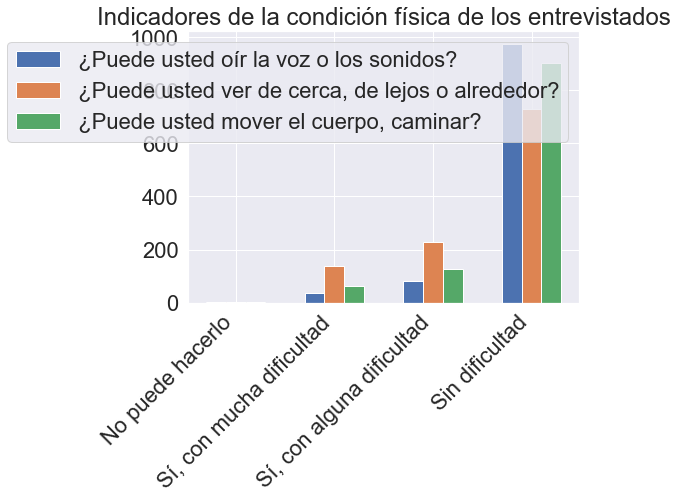

In [70]:
#bar plots for some of the variables that provide information about the physica state of the person interviewed

plt.figure(figsize=(7,5))

q16a = chc["16. Dada su condición física y mental, y sin ningún tipo de ayuda, ¿usted puede: \n 1. oír la voz o los sonidos?"].value_counts().sort_index()
q16b = chc["16. Dada su condición física y mental, y sin ningún tipo de ayuda, ¿usted puede: \n 3. ver de cerca, de lejos o alrededor?"].value_counts().sort_index()
q16c = chc["16. Dada su condición física y mental, y sin ningún tipo de ayuda, ¿usted puede: \n 4. mover el cuerpo, caminar?"].value_counts().sort_index()

plt.title("Indicadores de la condición física de los entrevistados")
plt.bar(q16a.index - 0.2, q16a,  width=0.2, label = '¿Puede usted oír la voz o los sonidos?')
plt.bar(q16b.index, q16b,  width=0.2, label = '¿Puede usted ver de cerca, de lejos o alrededor?')
plt.bar(q16c.index + 0.2, q16c,  width=0.2, label = '¿Puede usted mover el cuerpo, caminar?')

plt.xticks([1,2,3,4], 
           ["No puede hacerlo", "Sí, con mucha dificultad", "Sí, con alguna dificultad", "Sin dificultad"],
          rotation=45, ha="right");

plt.legend()
plt.show()

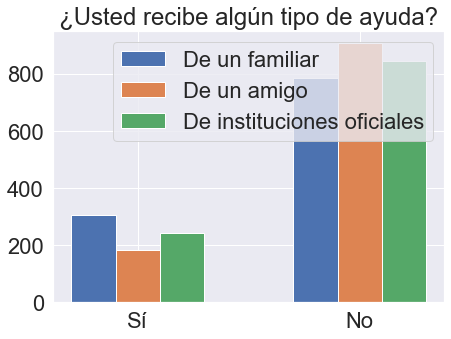

In [71]:
plt.figure(figsize=(7,5))

q26a = chc["1. De algún familiar?"].value_counts().sort_index()
q26b = chc["2. De amigos?"].value_counts().sort_index()
q26c = chc["3. De instituciones oficiales?"].value_counts().sort_index()

plt.title("¿Usted recibe algún tipo de ayuda?")
plt.bar(q26a.index - 0.2, q26a,  width=0.2, label = 'De un familiar')
plt.bar(q26b.index, q26b,  width=0.2, label = 'De un amigo')
plt.bar(q26c.index + 0.2, q26c,  width=0.2, label = 'De instituciones oficiales')

plt.xticks([1,2],["Sí","No"])

plt.legend();

Some of the numerical variables.

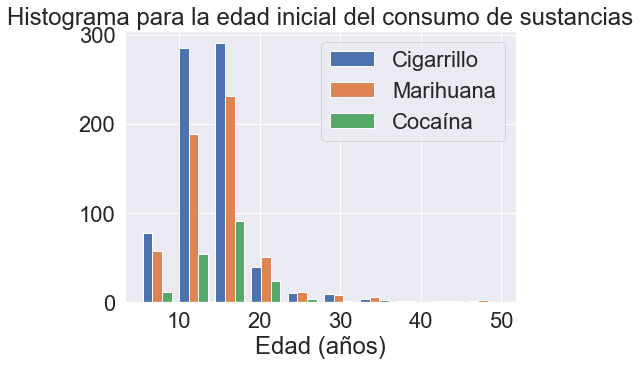

In [72]:
plt.figure(figsize=(7,5))

plt.hist([chc["Edad inicio del consumo    \n 1. cigarrillo"],
         chc["Edad inicio del consumo    \n 3. marihuana"],
         chc["Edad inicio del consumo           \n 5. cocaína"]], 
           label = ["Cigarrillo","Marihuana","Cocaína"])
plt.title("Histograma para la edad inicial del consumo de sustancias")
plt.xlabel("Edad (años)")
plt.legend();

<h1 align=left style="font-size:1.5vw"><span style="color:#2EA18C">3. Información de medidas correctivas enero 2017 a febrero 2022 </span></h1>  

<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">A) Importing the dataset:</span></h3>

In [73]:
#datset Información de medidas correctivas enero 2017 a febrero 2022
correc = pd.read_csv("./93._Informaci_n_de_medidas_correctivas_enero_2017_a_febrero_2022.csv")
correc.head(2)

DTO             LUGAR  \
0  SANTANDER  BUCARAMANGA - CM   
1  SANTANDER  BUCARAMANGA - CM   

                                UNIDAD_LABORA_POL FECHA_HECHOS HORA_HECHOS  \
0  MEBUC - PREVENCION Y EDUCACION CIUDADANA MEBUC   30/01/2017    17:45:00   
1  MEBUC - PREVENCION Y EDUCACION CIUDADANA MEBUC   30/01/2017    17:45:00   

  DIA_HECHOS             FECHA_CREACION                     LOCALIDAD  \
0      lunes  01/02/2017 09:49:25 a. m.  NO APLICA LOCALIDAD - COMUNA   
1      lunes  01/02/2017 09:49:25 a. m.  NO APLICA LOCALIDAD - COMUNA   

  BARRIO_HECHOS                                  SITIO  ...  \
0      SIN DATO  SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO  ...   
1      SIN DATO  SITIOS PÚBLICOS O ABIERTOS AL PÚBLICO  ...   

                DESCRIPCIÓN_CAPÍTULO NÚMERO_COMPORTAMIENTO  \
0  VIDA E INTEGRIDAD DE LAS PERSONAS                Num. 7   
1  VIDA E INTEGRIDAD DE LAS PERSONAS                Num. 7   

                          DESCRIPCIÓN_COMPORTAMIENTO RANGO_HORARIO  \
0  Portar armas neumáticas, de aire, de fogueo, d...   17:00-17:59   
1  Portar armas neumáticas, de aire, de fogueo, d...   17:00-17:59   

  RANGO_HORARIO_ORDEN  AÑO_NUM MES_NUM DIA_NUM CANTIDAD_UNICA ID  
0                  17     2017       1      30              1  1  
1                  17     2017       1      30              1  2  

[2 rows x 32 columns]

## - Columns

In [74]:
correc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197460 entries, 0 to 197459
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   DTO                         197460 non-null  object
 1   LUGAR                       197460 non-null  object
 2   UNIDAD_LABORA_POL           197460 non-null  object
 3   FECHA_HECHOS                197460 non-null  object
 4   HORA_HECHOS                 197460 non-null  object
 5   DIA_HECHOS                  197460 non-null  object
 6   FECHA_CREACION              197460 non-null  object
 7   LOCALIDAD                   197460 non-null  object
 8   BARRIO_HECHOS               197460 non-null  object
 9   SITIO                       197460 non-null  object
 10  ARTICULO                    197460 non-null  object
 11  COMPORTAMIENTO              197460 non-null  object
 12  APLICA_MEDIDA               197460 non-null  object
 13  MEDIDA                      1

<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">B) Missing values:</span></h3>

In [75]:
#the columns with missing values
correc.isna().sum()[correc.isna().sum() > 0]

NACIONALIDAD            249
DESCRIPCIÓN_CAPÍTULO     64
dtype: int64

This dataset has far less missing values than the previous one, and the data type seems to be correct. A lot of data is of the type string. Some columns are numerical but most are categoricl (represent a day of the week, for example).



<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">C) Giving consistency to our dataset and data cleaning:</span></h3>

In [76]:
#making the respective columns into datetime type
correc["FECHA_HECHOS"]= pd.to_datetime(correc["FECHA_HECHOS"],  format='%d/%m/%Y')
correc["HORA_HECHOS"]= pd.to_datetime(correc["HORA_HECHOS"], format='%H:%M:%S').dt.time
correc["AÑO_NUM"]= pd.to_datetime(correc["AÑO_NUM"], format = '%Y')
correc["MES_NUM"]= pd.to_datetime(correc["MES_NUM"], format = '%m')
correc["DIA_NUM"]= pd.to_datetime(correc["DIA_NUM"], format = '%d')
correc["RANGO_HORARIO_ORDEN"]= pd.to_datetime(correc["RANGO_HORARIO_ORDEN"], format = '%H')

correc["FECHA_CREACION"] = correc["FECHA_CREACION"].replace({'a. m.': 'AM', 'p. m.': 'PM'}, regex=True)
correc["FECHA_CREACION"]= pd.to_datetime(correc["FECHA_CREACION"], format='%d/%m/%Y %I:%M:%S %p')

<h3 align=left style="font-size:1.5vw"><span style="color:#2E7DA1">D) EDA:</span></h3>

In [77]:
#describng some of the numerical columns

correc[["EDAD","CURSO VIDA ORDEN","RANGO_HORARIO_ORDEN"]].describe()

EDAD  CURSO VIDA ORDEN
count  197460.000000     197460.000000
mean       28.346430          5.264560
std         9.671231          1.966445
min         0.000000          0.000000
25%        21.000000          4.000000
50%        25.000000          5.000000
75%        32.000000          6.000000
max        91.000000         17.000000

In the correc dataset we can see that the mean age of the people on this dataset is 28.3 years. We see, though, that thre must be some incorrect data, since the minimum age of one of the people in this dataset is 1 yer old. Thi dataset is "Georreferenciación de las medidas correctivas impuestas en el municipio según los comportamientos contrarios a la convivencia estipulados en la Ley 1801 de 2016, según el capítulo, artículo, numeral, curso de vida, etc.", a one year old data point is missplaced here. 

CURSO_VIDA_ORDEN o the category five represents the age group 25-29, the mos common one among the subjects on the dataset. This column is a little right skewed.

Finally, the hour where most of the correctiv measurements are executed is 1pm.

Now, showing the daily aomunt of correctional measures imposed:

## -Plotting the data

In [78]:
def plot_time( df, time_var, title, rot = 0):
    
    res = df.groupby([time_var])['ID'].count().reset_index(name="count")
    p = res.plot(x = time_var, y = "count", title = title, rot = rot)
    return p

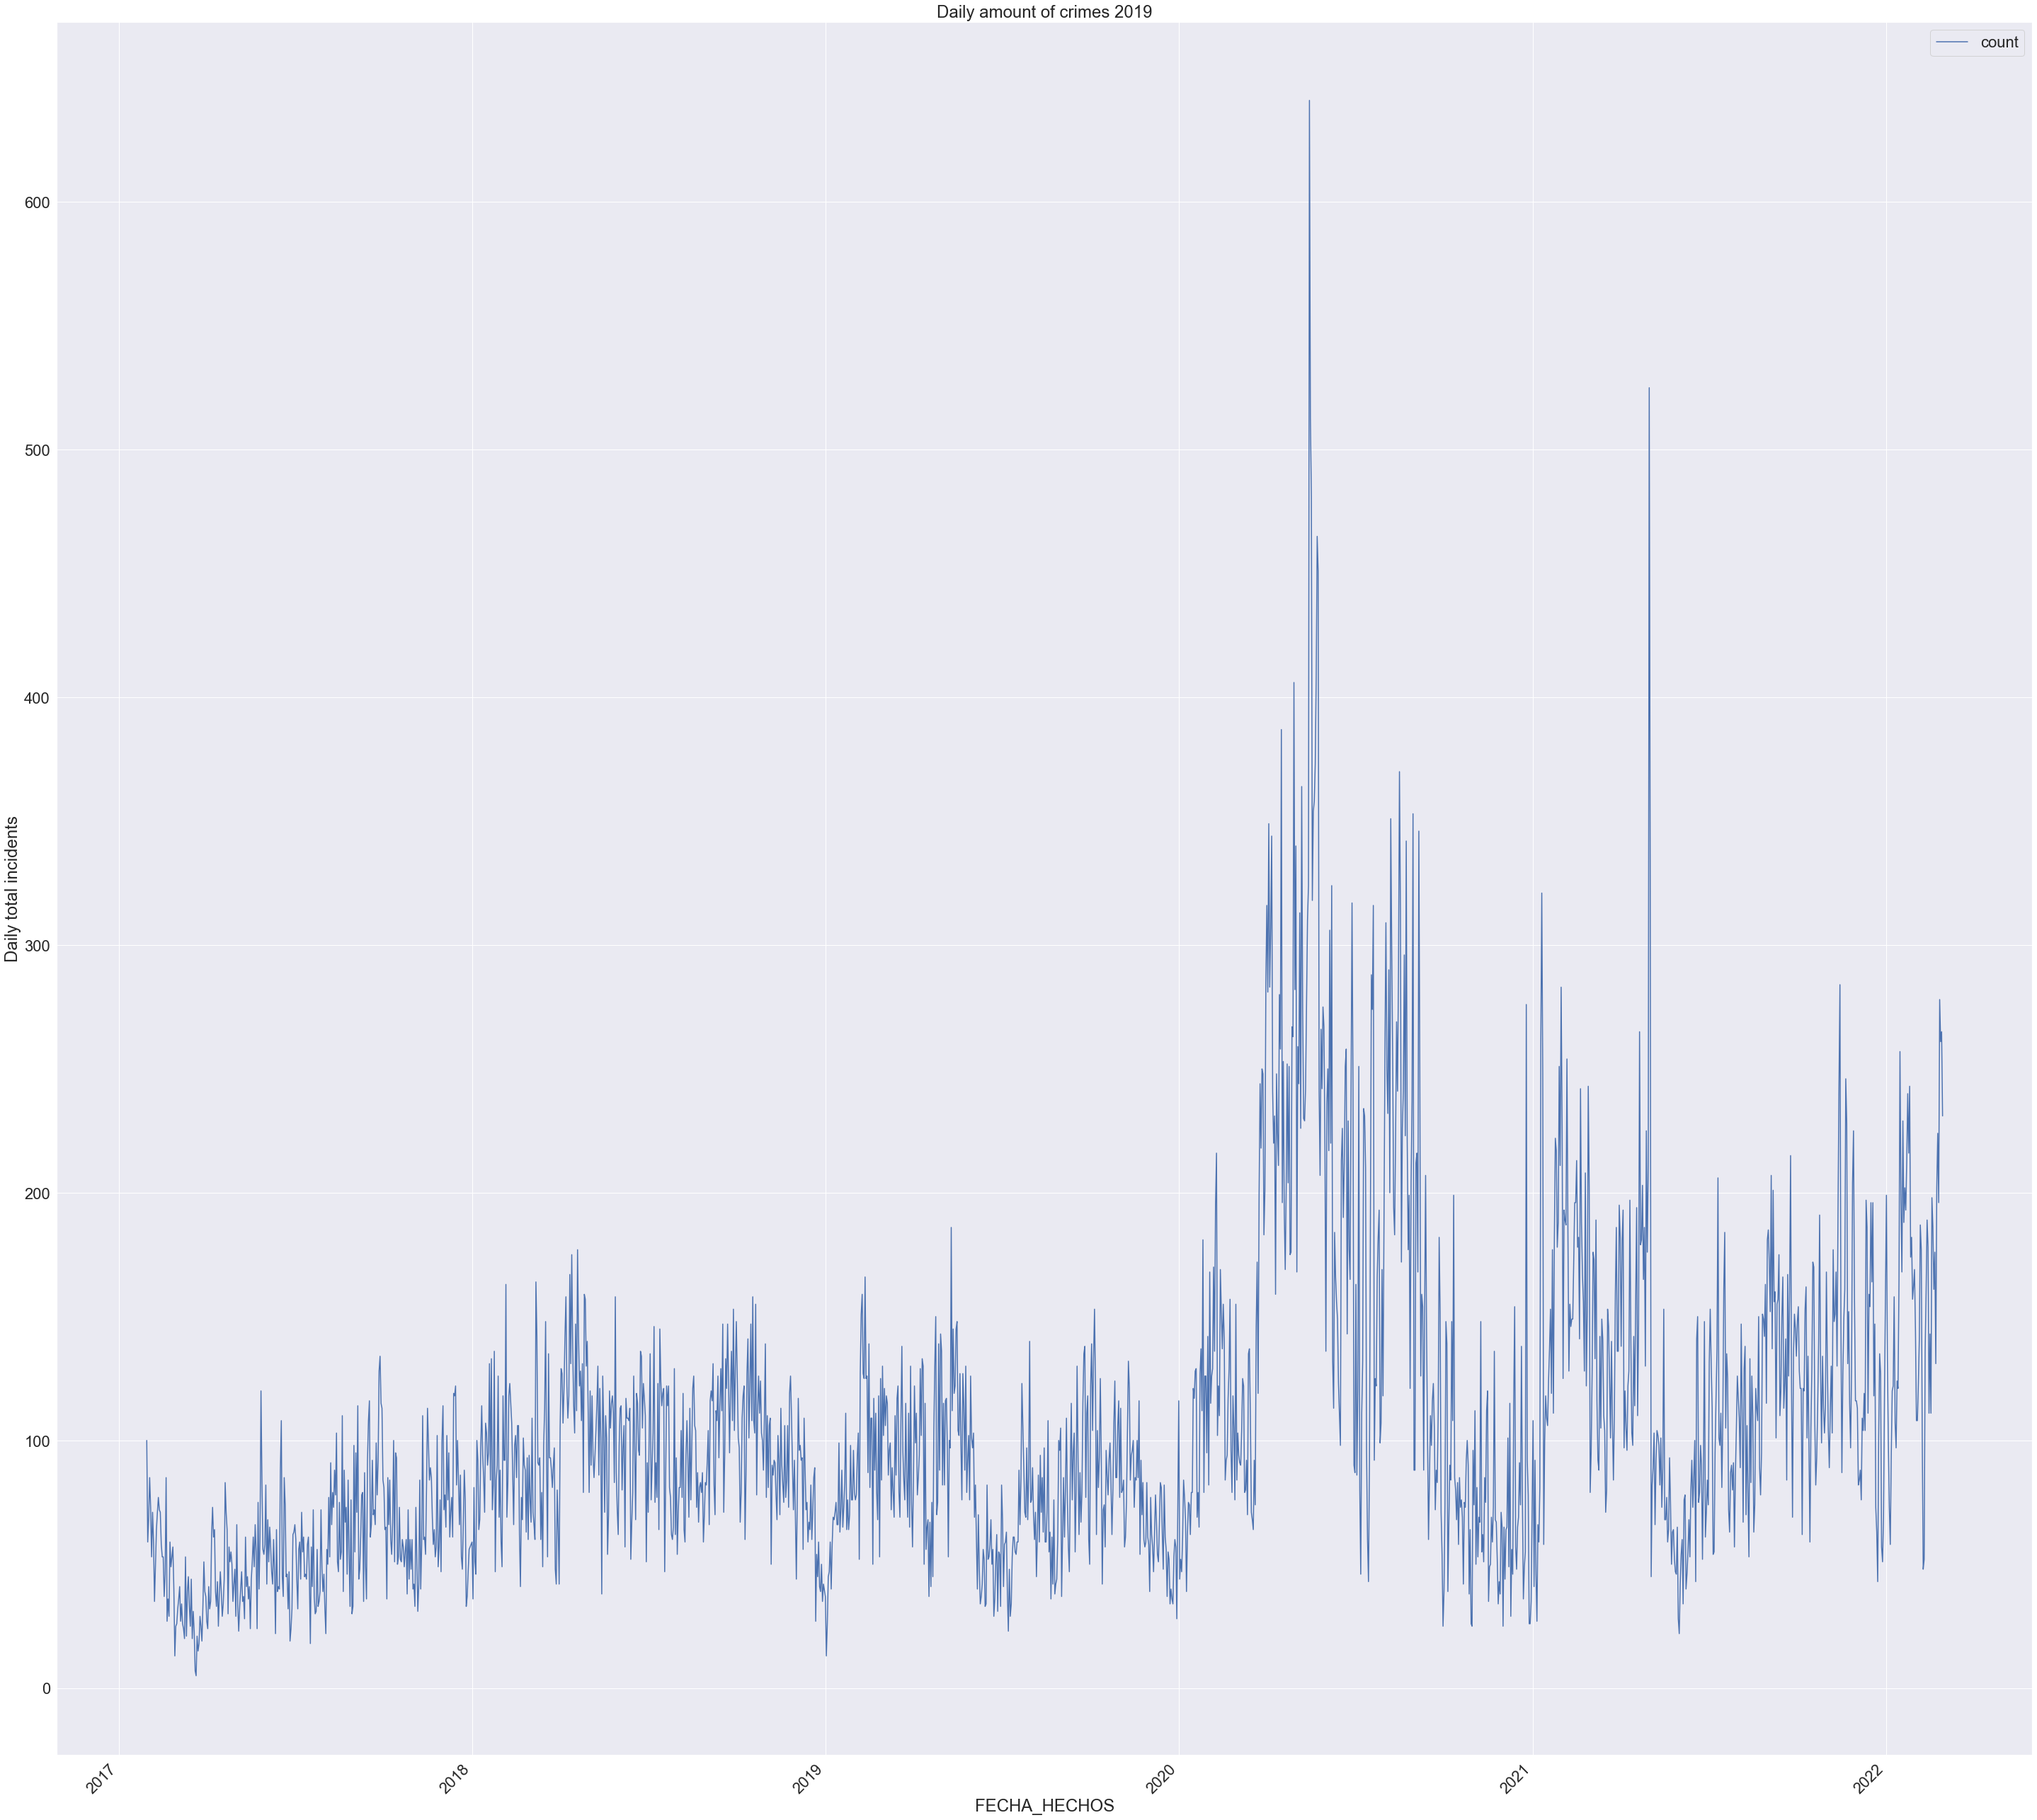

In [79]:
p_daily = plot_time( correc, "FECHA_HECHOS", "Daily amount of crimes 2019", rot = 45)
_ = plt.ylabel("Daily total incidents")

In the previous plot of amount of daily crimes across the years, we can see that the amount of crimes inceased in 2020, presumably because of the pandemic.

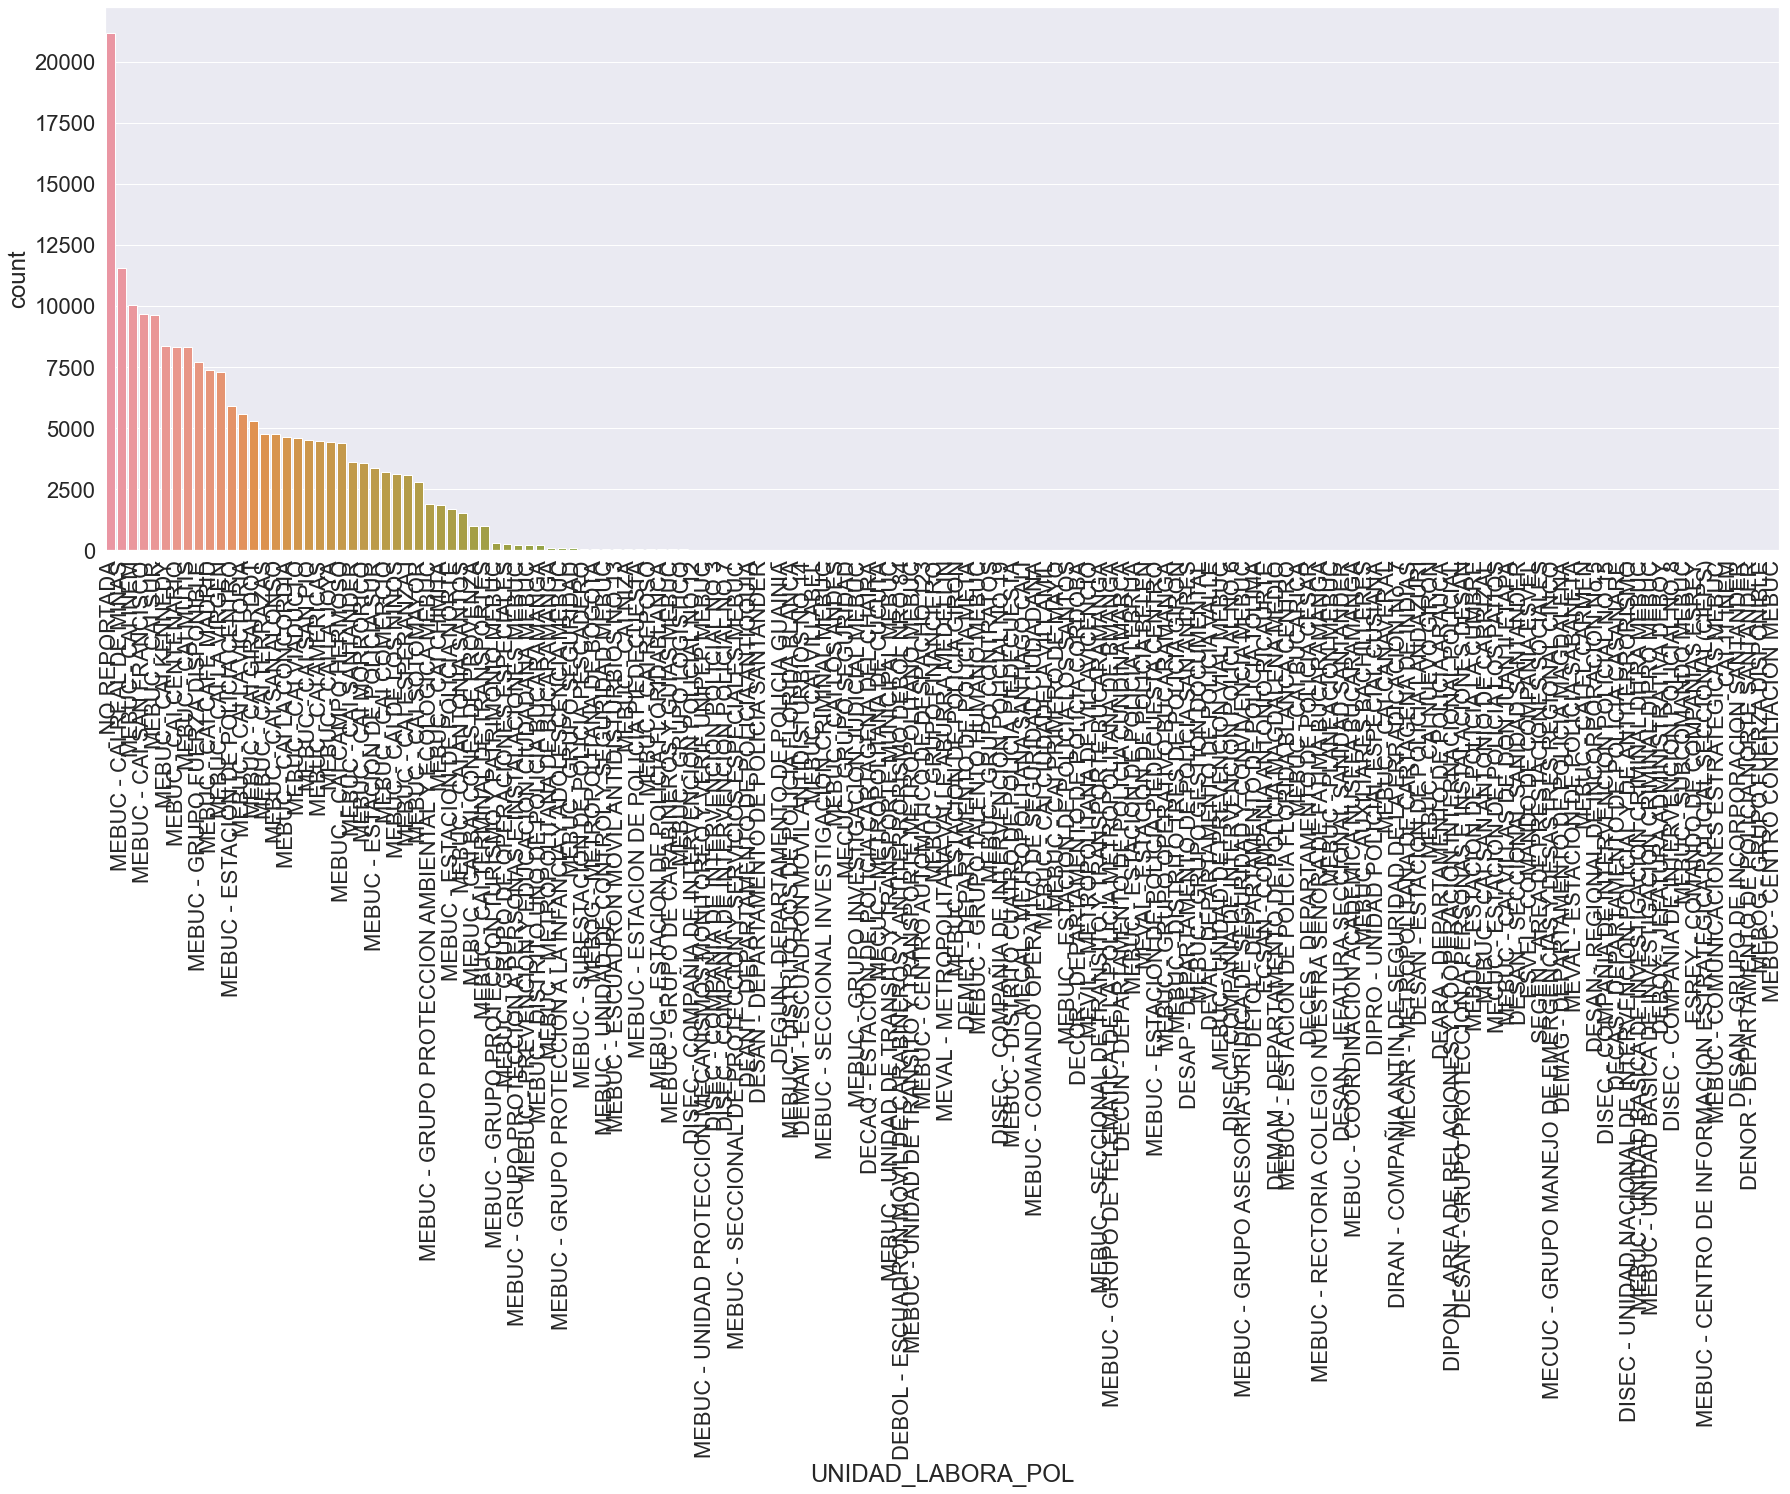

In [80]:
fig_dims = (30, 10)

fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.countplot(x="UNIDAD_LABORA_POL", data=correc, order = correc['UNIDAD_LABORA_POL'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

sns.set(font_scale = 1)

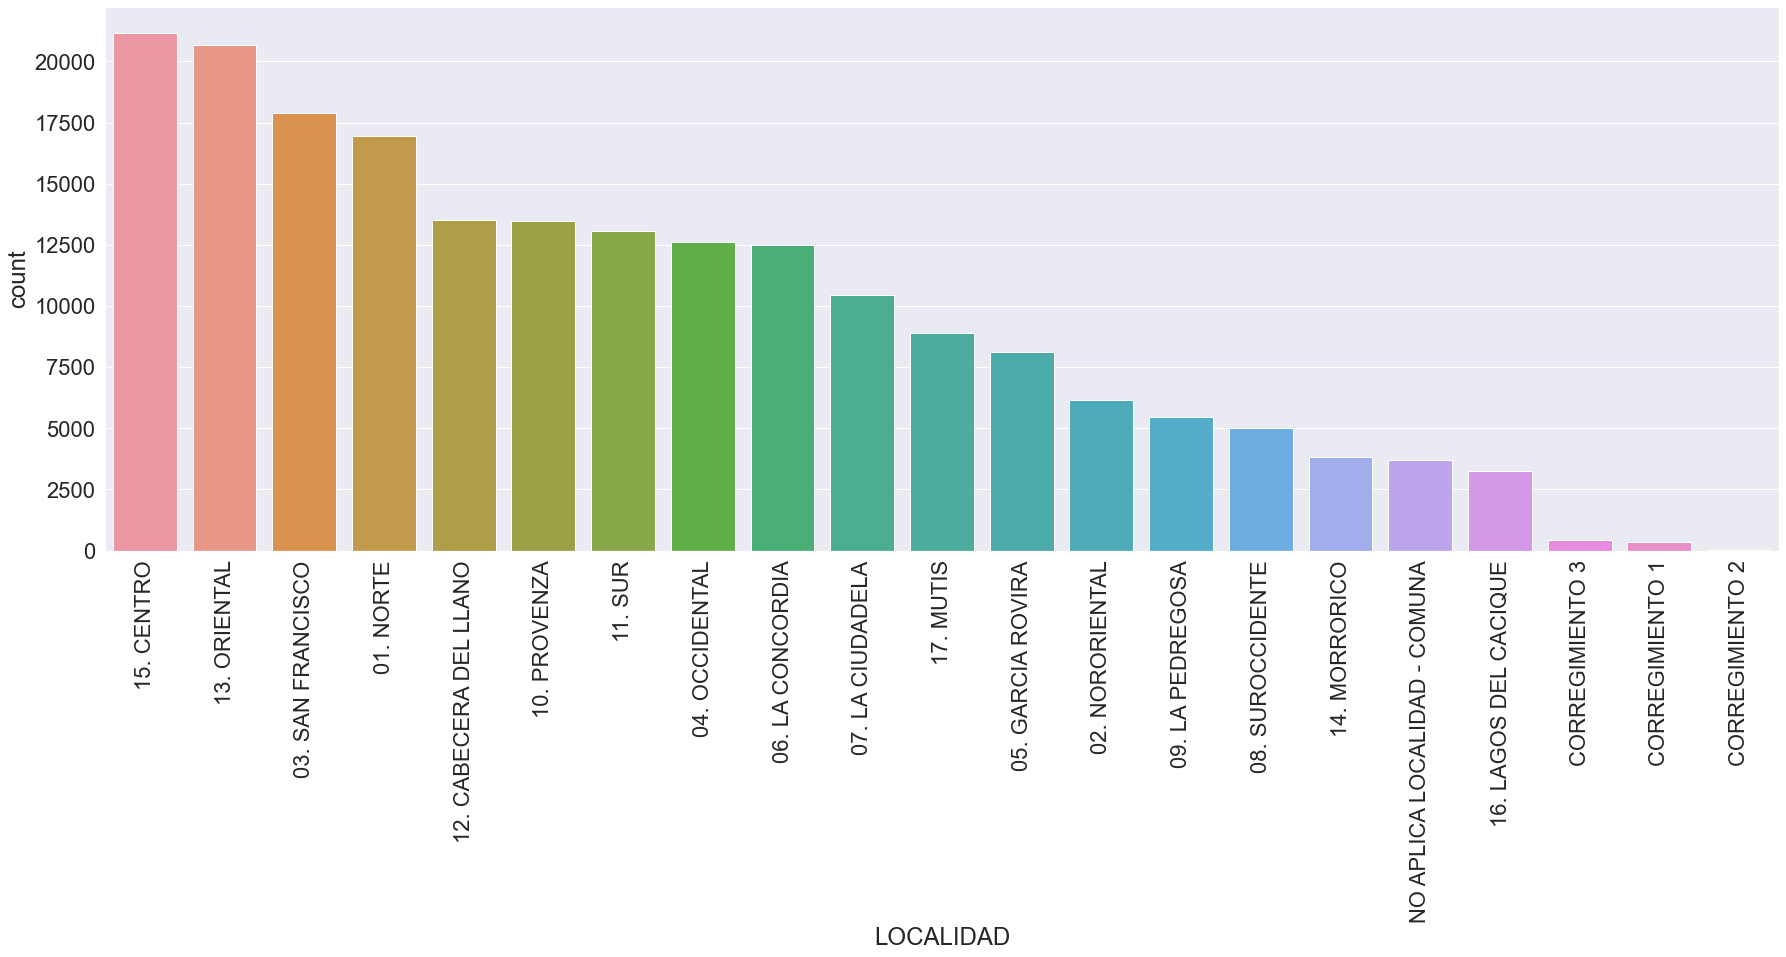

In [81]:
sns.set(font_scale = 2)

fig_dims = (30, 10)

fig, ax1 = plt.subplots(figsize=fig_dims)

ax1 = sns.countplot(x="LOCALIDAD", data=correc, order = correc['LOCALIDAD'].value_counts().index)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

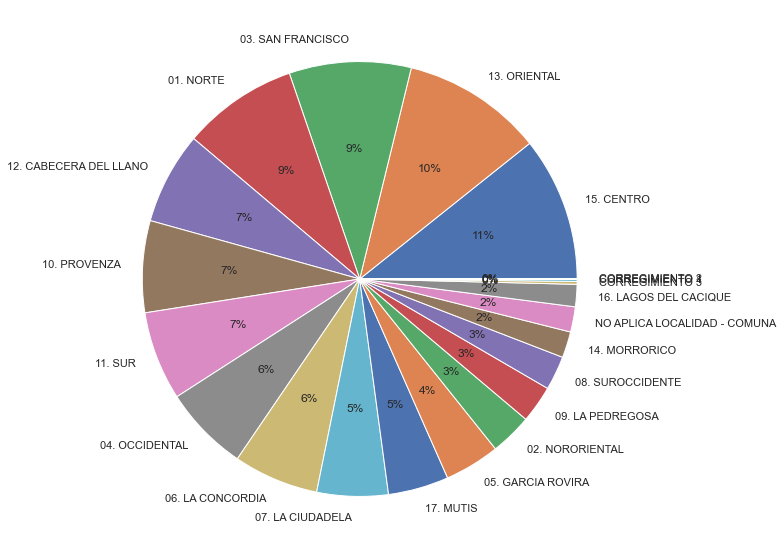

In [82]:
sns.set(font_scale = 1)
fig_dims = (10, 10)
fig = plt.subplots(figsize=fig_dims)
plt.pie(correc['LOCALIDAD'].value_counts(), labels = correc['LOCALIDAD'].value_counts().index, autopct='%.0f%%')
plt.show()

In [83]:
pd.crosstab(index=correc['LOCALIDAD'], columns=correc['NÚMERO_COMPORTAMIENTO'], margins=True)

NÚMERO_COMPORTAMIENTO         0  Art. 196  Art. 27  Art. 92  Lit. a  Lit. b  \
LOCALIDAD                                                                     
01. NORTE                     0         0        1        0      62      36   
02. NORORIENTAL               0         0        0        0      12       4   
03. SAN FRANCISCO             0         0        1        0      36      11   
04. OCCIDENTAL                1         0        0        0      33       8   
05. GARCIA ROVIRA             0         0        1        0      14       4   
06. LA CONCORDIA              0         0        0        0      13       7   
07. LA CIUDADELA              0         0        1        0      15      10   
08. SUROCCIDENTE              0         0        0        0       0       3   
09. LA PEDREGOSA              0         0        0        1      12       0   
10. PROVENZA                  0         0        0        0      28      29   
11. SUR                       0         0        0        0      22       8   
12. CABECERA DEL LLANO        0         0        0        0      20      25   
13. ORIENTAL                  0         1        0        0      38      14   
14. MORRORICO                 0         0        0        0      16       6   
15. CENTRO                    0         0        1        0       6       3   
16. LAGOS DEL CACIQUE         0         0        0        0       4       5   
17. MUTIS                     0         0        0        0      16      11   
CORREGIMIENTO 1               0         0        0        0       2       0   
CORREGIMIENTO 2               0         0        0        0       0       0   
CORREGIMIENTO 3               0         0        0        0       0       0   
NO APLICA LOCALIDAD - COMUNA  0         0        0        0       3       8   
All                           1         1        5        1     352     192   

NÚMERO_COMPORTAMIENTO         Lit. c  Lit. d  Lit. e  Lit. f  ...  Num. 2  \
LOCALIDAD                                                     ...           
01. NORTE                         39       0      39       3  ...    3879   
02. NORORIENTAL                   20       0       0       0  ...    1772   
03. SAN FRANCISCO                 66       3      30       0  ...    4542   
04. OCCIDENTAL                    31       2      24       0  ...    3603   
05. GARCIA ROVIRA                 40       0       6       0  ...    1993   
06. LA CONCORDIA                  30      14       9       3  ...    3134   
07. LA CIUDADELA                  10       0       0       0  ...    1955   
08. SUROCCIDENTE                   2       1       0       0  ...    1315   
09. LA PEDREGOSA                  20       0       3       0  ...    1319   
10. PROVENZA                       8      11       5       4  ...    2555   
11. SUR                           16       0       3       0  ...    3414   
12. CABECERA DEL LLANO            25       0      36       0  ...    2626   
13. ORIENTAL                      36       8      45       0  ...    3886   
14. MORRORICO                     12       0       0       0  ...    1004   
15. CENTRO                        16       9      21       0  ...    5172   
16. LAGOS DEL CACIQUE              0       0       0       0  ...     728   
17. MUTIS                         15       0       0       0  ...    2535   
CORREGIMIENTO 1                    0       0       0       0  ...      64   
CORREGIMIENTO 2                    0       0       0       0  ...       2   
CORREGIMIENTO 3                    0       0       0       0  ...     103   
NO APLICA LOCALIDAD - COMUNA      47       0       3       0  ...     652   
All                              433      48     224      10  ...   46253   

NÚMERO_COMPORTAMIENTO         Num. 20  Num. 3  Num. 4  Num. 5  Num. 6  Num. 7  \
LOCALIDAD                                                                       
01. NORTE                           0     449     377     137    7941    1948   
02. NORORIE

In [84]:
#the comportamientos are furter explained in the column DESCRIPCIÓN_COMPORTAMIENTO, but the explanations are
#extensive, so I prefer to use this column, which has sorter names fot them. We have a total of 29 comportamientos

correc['NÚMERO_COMPORTAMIENTO'].value_counts()

Num. 6      72019
Num. 2      46253
Num. 7      30120
Num. 8      16022
Num. 1      12620
Num. 4       5323
Num. 3       4171
Num. 16      3299
Num. 13      2600
Num. 11      1589
Num. 5       1125
Lit. c        433
Num. 10       373
Lit. a        352
Num. 12       252
Lit. e        224
Num. 9        216
Lit. b        192
Num. 14       153
Lit. d         48
Num. 15        37
Lit. h         19
Lit. f         10
Art. 27         5
Num. 19         1
Num. 20         1
0               1
Art. 196        1
Art. 92         1
Name: NÚMERO_COMPORTAMIENTO, dtype: int64

In [85]:
barrios = pd.read_csv('https://raw.githubusercontent.com/Joaron4/team211_datasets/main/barrios_bmanga.csv',encoding="utf-8")
barrios

FID              NOMBRE  CATEGORIA     COMUNA  Manzanas  Personas  \
0      0           1 DE MAYO     BARRIO  COMUNA 05       6.0     828.0   
1      1         13 DE JUNIO     BARRIO  COMUNA 01       5.0     331.0   
2      2         20 DE JULIO     BARRIO  COMUNA 08       1.0     343.0   
3      3         23 DE JUNIO     BARRIO  COMUNA 04      16.0    1656.0   
4      4          5 DE ENERO  A. URBANO  COMUNA 04      10.0     330.0   
..   ...                 ...        ...        ...       ...       ...   
258  258            VIJAGUAL   A. RURAL                  3.0     126.0   
259  259          VILLA LINA   A. RURAL  COMUNA 01      10.0     405.0   
260  260           VILLA LUZ   A. RURAL                 13.0     495.0   
261  261  VILLAS DE GIRARDOT  A. URBANO  COMUNA 04      23.0     848.0   
262  262           ZARABANDA  A. URBANO  COMUNA 04       5.0     471.0   

     Hombres  Mujeres  Edad0a9  Edad10a19  ...  Edad80omas  Viviendas  \
0      412.0    416.0    127.0      122.0  ...        13.0      229.0   
1      160.0    171.0     52.0       42.0  ...         4.0      114.0   
2      154.0    189.0     46.0       63.0  ...         4.0       87.0   
3      809.0    847.0    216.0      231.0  ...        43.0      458.0   
4      167.0    163.0     77.0       74.0  ...         5.0      107.0   
..       ...      ...      ...        ...  ...         ...        ...   
258     68.0     58.0     22.0       21.0  ...         2.0       35.0   
259    204.0    201.0     63.0       84.0  ...         2.0      164.0   
260    248.0    247.0    102.0       88.0  ...         2.0      168.0   
261    409.0    439.0    158.0      193.0  ...         6.0      424.0   
262    225.0    246.0    114.0       84.0  ...         2.0      137.0   

     Hogares  HogaresDes  EstratoN1  EstratoN2  EstratoN3  EstratoN4  \
0      233.0         9.0        1.0      193.0       18.0        0.0   
1       93.0         4.0       30.0       60.0        0.0        2.0   
2      103.0         1.0       53.0       25.0        3.0        3.0   
3      490.0        22.0        8.0      348.0       58.0        1.0   
4       96.0         4.0       68.0        0.0        0.0        0.0   
..       ...         ...        ...        ...        ...        ...   
258     33.0         4.0       30.0        1.0        0.0        0.0   
259    157.0         8.0      134.0        2.0        0.0        1.0   
260    145.0        27.0      131.0        5.0        0.0        0.0   
261    258.0        41.0      189.0        5.0        0.0        0.0   
262    136.0         5.0       95.0        0.0        2.0        0.0   

     EstratoN5  EstratoN6  
0          0.0        0.0  
1          0.0        0.0  
2          0.0        0.0  
3          0.0        0.0  
4          0.0        0.0  
..         ...        ...  
258        0.0        0.0  
259        0.0        0.0  
260        0.0        0.0  
261        0.0        0.0  
262        0.0        0.0  

[263 rows x 26 columns]

In [86]:
barrios['NOMBRE'] = barrios['NOMBRE'].str.upper().str.replace('DDE','DE')

In [87]:
barrios

FID              NOMBRE  CATEGORIA     COMUNA  Manzanas  Personas  \
0      0           1 DE MAYO     BARRIO  COMUNA 05       6.0     828.0   
1      1         13 DE JUNIO     BARRIO  COMUNA 01       5.0     331.0   
2      2         20 DE JULIO     BARRIO  COMUNA 08       1.0     343.0   
3      3         23 DE JUNIO     BARRIO  COMUNA 04      16.0    1656.0   
4      4          5 DE ENERO  A. URBANO  COMUNA 04      10.0     330.0   
..   ...                 ...        ...        ...       ...       ...   
258  258            VIJAGUAL   A. RURAL                  3.0     126.0   
259  259          VILLA LINA   A. RURAL  COMUNA 01      10.0     405.0   
260  260           VILLA LUZ   A. RURAL                 13.0     495.0   
261  261  VILLAS DE GIRARDOT  A. URBANO  COMUNA 04      23.0     848.0   
262  262           ZARABANDA  A. URBANO  COMUNA 04       5.0     471.0   

     Hombres  Mujeres  Edad0a9  Edad10a19  ...  Edad80omas  Viviendas  \
0      412.0    416.0    127.0      122.0  ...        13.0      229.0   
1      160.0    171.0     52.0       42.0  ...         4.0      114.0   
2      154.0    189.0     46.0       63.0  ...         4.0       87.0   
3      809.0    847.0    216.0      231.0  ...        43.0      458.0   
4      167.0    163.0     77.0       74.0  ...         5.0      107.0   
..       ...      ...      ...        ...  ...         ...        ...   
258     68.0     58.0     22.0       21.0  ...         2.0       35.0   
259    204.0    201.0     63.0       84.0  ...         2.0      164.0   
260    248.0    247.0    102.0       88.0  ...         2.0      168.0   
261    409.0    439.0    158.0      193.0  ...         6.0      424.0   
262    225.0    246.0    114.0       84.0  ...         2.0      137.0   

     Hogares  HogaresDes  EstratoN1  EstratoN2  EstratoN3  EstratoN4  \
0      233.0         9.0        1.0      193.0       18.0        0.0   
1       93.0         4.0       30.0       60.0        0.0        2.0   
2      103.0         1.0       53.0       25.0        3.0        3.0   
3      490.0        22.0        8.0      348.0       58.0        1.0   
4       96.0         4.0       68.0        0.0        0.0        0.0   
..       ...         ...        ...        ...        ...        ...   
258     33.0         4.0       30.0        1.0        0.0        0.0   
259    157.0         8.0      134.0        2.0        0.0        1.0   
260    145.0        27.0      131.0        5.0        0.0        0.0   
261    258.0        41.0      189.0        5.0        0.0        0.0   
262    136.0         5.0       95.0        0.0        2.0        0.0   

     EstratoN5  EstratoN6  
0          0.0        0.0  
1          0.0        0.0  
2          0.0        0.0  
3          0.0        0.0  
4          0.0        0.0  
..         ...        ...  
258        0.0        0.0  
259        0.0        0.0  
260        0.0        0.0  
261        0.0        0.0  
262        0.0        0.0  

[263 rows x 26 columns]

In [88]:
barrios.to_csv('barrios_bmanga.csv', encoding = 'utf-8',index=False)